## Цели задачи:  
1) Построить 2-х уровневую rec-sys модель (1 или несколько кандидатных моделей + ранжирование) на датасете movielens 100k https://grouplens.org/datasets/movielens/100k/  
2) Провести валидацию полученной модели (основная метрика для максимизации MAP@10)  
3) Объяснить (письменно в комментариях к коду) логику своего выбора; указать слабые и сильные аспекты своего решения  

## Схема программы

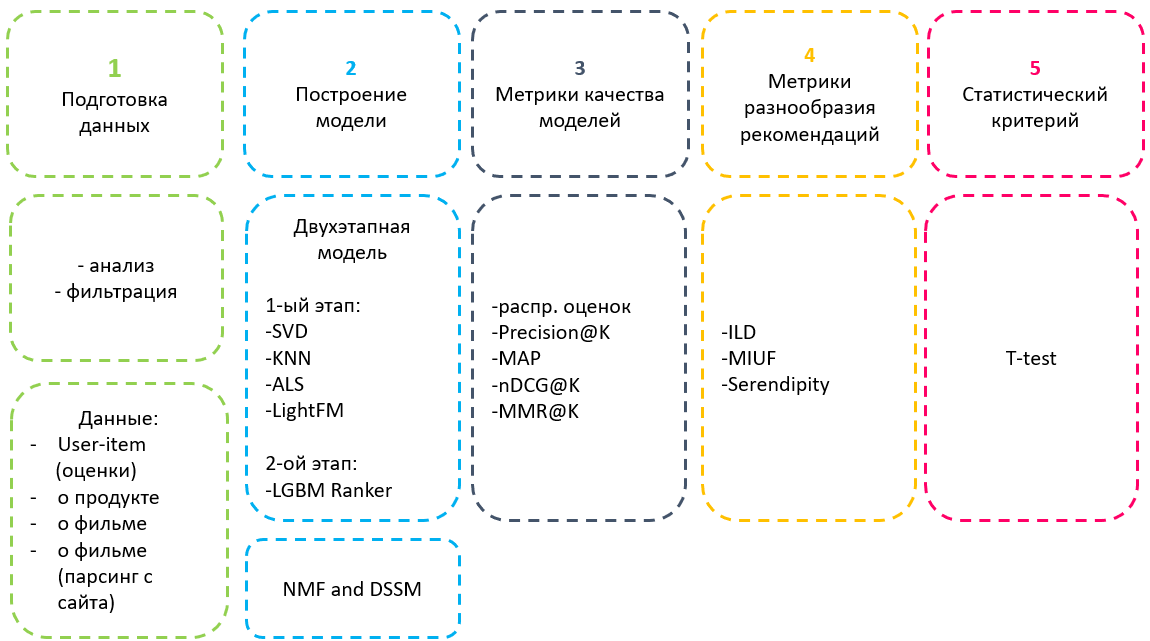

## Связь данных с моделями

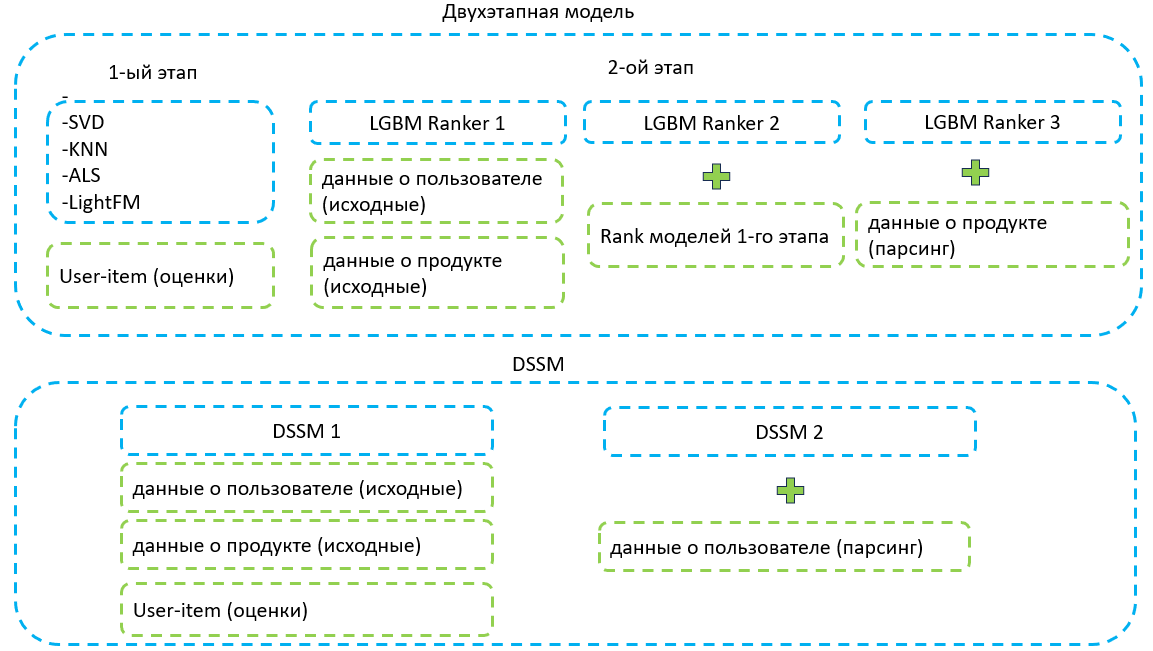

## Оглавление  

<a href="#1-Подготовка-данных" style="margin-left: 0px;">1 Подготовка данных</a>  
<a href="#1.1-Загрузка-данных" style="margin-left: 30px;">1.1 Загрузка данных</a>  
<a href="#1.2-Анализ-данных" style="margin-left: 30px;">1.2 Анализ данных</a>  
<a href="#1.2.1-Готовим-фичи-для-таблиц-users-и-items" style="margin-left: 50px;">1.2.1 Готовим фичи для таблиц users и items</a>  
<a href="#1.2.2-Собираем-матрицу-взаимодействий" style="margin-left: 50px;">1.2.2 Собираем матрицу взаимодействий</a>  
 
<a href="#2-Построение-моделей" style="margin-left: 0px;">2 Построение моделей</a>  
<a href="#2.1-Двухэтапная-модель" style="margin-left: 30px;">2.1 Двухэтапная модель</a>  
<a href="#2.1.1-Первый-этап.-Коллаборативная-фильтрация" style="margin-left: 50px;">2.1.1 Первый этап. Коллаборативная фильтрация</a>  
<a href="#2.1.1.1-SVD" style="margin-left: 70px;">2.1.1.1 SVD</a>   
<a href="#2.1.1.2-Implicit-KNN" style="margin-left: 70px;">2.1.1.2 Implicit KNN</a>   
<a href="#2.1.1.2.1-CosineRecommender" style="margin-left: 90px;">2.1.1.2.1 CosineRecommender</a>    
<a href="#2.1.1.2.2-BM25Recommender" style="margin-left: 90px;"> 2.1.1.2.2 BM25Recommender</a>   
<a href="#2.1.1.2.3-TFIDFRecommender" style="margin-left: 90px;">2.1.1.2.3 TFIDFRecommender</a>  
<a href="#2.1.1.3-ALS-(Alternating-Least-Squares)" style="margin-left: 70px;">2.1.1.3 ALS (Alternating Least Squares)</a>  
<a href="#2.1.1.4-LightFM" style="margin-left: 70px;">2.1.1.4 LightFM</a>    

<a href="#2.1.2-Второй-этап.-Улучшение-модели-ранжирования.-LGBMRanker()" style="margin-left: 50px;">2.1.2 Второй этап. Улучшение модели ранжирования. LGBMRanker()</a>   

<a href="#2.2-NMF-and-dssm" style="margin-left: 30px;">2.2 NMF and dssm</a>   
<a href="#2.2.1-Функция-потерь-Triplet-loss" style="margin-left: 50px;">2.2.1 Функция потерь Triplet loss</a>   
<a href="#2.2.2-generator" style="margin-left: 50px;">2.2.2 generator</a>   
<a href="#2.2.3-Архитектура-модели" style="margin-left: 50px;">2.2.3 Архитектура модели</a>   
<a href="#2.2.4-Построение-модели" style="margin-left: 50px;">2.2.4 Построение модели</a>   


<a href="#3-Метрики-качества" style="margin-left: 0px;">3 Метрики качества</a>  

<a href="#3.1-Очистка-выборки-Test" style="margin-left: 30px;">3.1 Очистка выборки Test</a>     
<a href="#3.2-Рассчёт-метрик" style="margin-left: 30px;">3.3 Рассчёт метрик</a>   
<a href="#3.2.1-Распределение-оценок-для-различных-моделей" style="margin-left: 50px;">3.2.1 Распределение оценок для различных моделей</a>   
<a href="#3.2.2-Precision-at-K-(Precision@K)" style="margin-left: 50px;">3.2.2 Precision at K (Precision@K)</a>  
<a href="#3.2.3-MAP" style="margin-left: 50px;">3.2.3 MAP</a>   
<a href="#3.2.4-Normalized-Discounted-Cumulative-Gain-at-K-(nDCG@K)" style="margin-left: 50px;">3.2.4 Normalized Discounted Cumulative Gain at K (nDCG@K)</a>    
<a href="3.2.5-Mean-reciprocal-rank-(MRR@K)" style="margin-left: 50px;">3.2.5 Mean reciprocal rank (MRR@K)</a>   
<a href="#3.2.6-All-metrisc" style="margin-left: 50px;">3.2.6 All metrisc</a>  



<a href="#4-Метрики-разнообразия-рекомендаций" style="margin-left: 0px;">4 Метрики разнообразия рекомендаций</a>   
<a href="#4.1-Формирование-таблиц-для-подсчёта-Diversity-метрик" style="margin-left: 30px;">4.1 Формирование таблиц для подсчёта Diversity метрик</a>  
<a href="#4.2-Intra-List-Diversity-(𝐼𝐿𝐷)" style="margin-left: 30px;">4.2 Intra-List Diversity (𝐼𝐿𝐷)</a>    
<a href="#4.3-Mean-Inverse-User-Frequency-(𝑀𝐼𝑈𝐹)" style="margin-left: 30px;">4.3 Mean Inverse User Frequency (𝑀𝐼𝑈𝐹)</a>  
<a href="#4.4-Serendipity" style="margin-left: 30px;">4.4 Serendipity</a>  
<a href="#4.5-ALL-Diversity-metrics" style="margin-left: 30px;">4.5 ALL Diversity metrics</a>    

<a href="#5-Статистический-критерий" style="margin-left: 0px;">5 Статистический критерий</a>  
<a href="#5.1-Обучаем-модели-LGBMRanker-на-двух-наборах-данных" style="margin-left: 30px;">5.1 Обучаем модели LGBMRanker на двух наборах данных</a>  
<a href="#5.2-Получаем-prediction-и-rank-моделей-на-выборке-Test" style="margin-left: 30px;">5.2 Получаем prediction и rank моделей на выборке Test</a>   
<a href="#5.3-Считаем-метрики-для-10-моделей" style="margin-left: 30px;">5.3 Считаем метрики для 10 моделей</a>   
<a href="#5.4-T-test,-p_value" style="margin-left: 30px;">5.4 T-test, p_value</a>

## 1 Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import math

### 1.1 Загрузка данных

In [3]:
# Чтение файла данных с рейтингами

file_path = r'ml-100k\u.data'

# Чтение данных, указывая, что разделитель — табуляция
columns = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv(file_path, sep='\t', names=columns)
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Чтение файла u.data
file_path_Train = r'ml-100k\u1.base'
file_path_Test = r'ml-100k\u1.test'

column_names = ['user_id', 'item_id', 'rating', 'timestamp']

# Чтение данных, указывая, что разделитель — табуляция
data_Train = pd.read_csv(file_path_Train, sep='\t', names = column_names, header = None, encoding='ISO-8859-1')
data_Test = pd.read_csv(file_path_Test, sep='\t', names = column_names, header = None, encoding='ISO-8859-1')

data_Train['timestamp'] = pd.to_datetime(data_Train['timestamp'], unit='s')
data_Test['timestamp'] = pd.to_datetime(data_Test['timestamp'], unit='s')

In [4]:
# Чтение файла данных о пользователе (user_data)

file_path = r'ml-100k\u.user'

columns_names = ['user_id','age','gender','occupation','zip code']

# Чтение данных, указывая, что разделитель — табуляция
user_data = pd.read_csv(file_path, sep='|', names = columns_names, header = None, encoding='ISO-8859-1')

In [6]:
# Чтение файла данных о фильмах (item_data)
file_path = r'ml-100k\u.item'

column_names = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_url', 
               'unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 
               'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 
               'romance', 'sci_fi', 'thriller', 'war', 'western']

# Чтение данных, указывая, что разделитель — табуляция
movie_data = pd.read_csv(file_path, sep='|', names=column_names, encoding='ISO-8859-1')

In [7]:
# Чтение файла данных о фильмах (item_data)
file_path = r'ml-100k\movie_data_add.csv'

# Чтение данных, указывая, что разделитель — табуляция
movie_data_add = pd.read_csv(file_path, sep=',')

### 1.2 Анализ данных

## EDA (Exploratory Data Analysis)  
Предварительный анализ данных  

Для начала посмотрим на данные:

#### Данные взаимодействия

user_id	- id пользователя  
item_id - id фильма   
rating - рейтинг  
timestamp - время проставления рейтинга  

In [8]:
data_Train.head()

,user_id,item_id,rating,timestamp
0,1,1,5,1997-09-22 22:02:38
1,1,2,3,1997-10-15 05:26:11
2,1,3,4,1997-11-03 07:42:40
3,1,4,3,1997-10-15 05:25:19
4,1,5,3,1998-03-13 01:15:12


#### Данные пользователя

user_id	 - id пользователя  
age	- возраст  
gender - пол  
occupation - род деятельности  
zip code - почтовый индекс  

In [9]:
user_data.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### Данные продукта

item_id - id фильма  
movie_title - название фильма  
release_date - дата выпуска  
video_release_date - все пустые
IMDb_url - ссылка на страницу фильма на сайте IMDb  
unknown,..., western - жанры (1 - Да /0 - Нет), unknown	- жанр неизвестен  

In [10]:
movie_data.head()

,item_id,movie_title,release_date,video_release_date,IMDb_url,unknown,action,adventure,animation,children,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Дополнительные данные продукта

item_id - id фильма  
runtime - длительность фильма   
vote_average - средняя оценка    
vote_count - количество проголосовавших    
first Star	 - главная звезда фильма  
Cary Grant,Bruce Willis,Robert De Niro - главная звезда в формате one-hot-encoding   

In [11]:
movie_data_add.head()

,item_id,runtime,vote_average,vote_count,first Star,Cary Grant,Bruce Willis,Robert De Niro,John Travolta,Arnold Schwarzenegger,...,Laurence Fishburne,Meg Ryan,Leslie Nielsen,Wesley Snipes,Alec Baldwin,Daniel Day-Lewis,Audrey Hepburn,Steven Seagal,Harvey Keitel,Woody Harrelson
0,1,81,7.971,18326.0,Tom Hanks,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,130,6.891,3844.0,Pierce Brosnan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,98,5.800,2626.0,Tim Roth,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,105,6.500,1027.0,John Travolta,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,124,6.500,938.0,Sigourney Weaver,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.2.1 Готовим фичи для таблиц users и items

#### Готовим фичи пользователей

Посмотрим, какие фичи в датасете фильмов являются категориальными и закодируем их с помощью one-hot encoding.

In [10]:
users_df = user_data.copy()
users_df['gender'] = users_df['gender'].replace({'F': 0, 'M': 1})
users_df = pd.get_dummies(users_df, columns=['occupation'], dtype=int)
users_ohe_df = users_df.drop(columns=['zip code']).copy()

print(users_ohe_df.shape)
users_ohe_df.head()

(943, 24)


,user_id,age,gender,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Готовим фичи айтемов

In [11]:
items_ohe_df = movie_data.copy()
print(items_ohe_df.shape)

(1682, 24)


#### Кодируем их точно так же - one-hot'ом.

1) Создаём столбец 'number of days after the release' - количество дней между последней датой и датой релиза (насколько старый фильм)

In [12]:
# Самая поздняя дата
Max_date = max(data_Train['timestamp'])
Max_date

number_of_days_after_the_release_column = (Max_date - pd.to_datetime(items_ohe_df['release_date'], format='%d-%b-%Y')).dt.days
items_ohe_df.insert(1, 'number of days after the release', number_of_days_after_the_release_column)
print(items_ohe_df.shape)

(1682, 25)


2. удаляем столбцы, которые не будем использовать

In [13]:
items_ohe_df.drop(columns=['movie_title','release_date','video_release_date','IMDb_url'],inplace=True)

print(items_ohe_df.shape)
items_ohe_df.head()

(1682, 21)


,item_id,number of days after the release,unknown,action,adventure,animation,children,comedy,crime,documentary,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,1207.0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1207.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1207.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1207.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1207.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


3. Соединяем дополнительные данные о фильме к исходным данным о фильмах и нормируем их

In [14]:
print(items_ohe_df.shape)
items_ohe_df = pd.merge(items_ohe_df,
         movie_data_add.drop(columns=['first Star']),
         on='item_id',how ='left')

print(items_ohe_df.shape)

print(sum(items_ohe_df.runtime.isna()), "из 1283 (7%) не нашёлся в парсенных данных")

(1682, 21)
(1682, 64)
490 из 1283 (7%) не нашёлся в парсенных данных


#### Почему всего 1283 фильма? Потому что далее будет очистка данных и я парсил данные только для нужных фильмов

4. Отнормируем столбцы к виду "от 0 до "1, поделив их на максимумы. 

In [15]:
max_number_of_days_after_the_release = max(items_ohe_df['number of days after the release'])
print('max_number of days after the release: ', max_number_of_days_after_the_release)

max_runtime = max(items_ohe_df.runtime)
print('max_runtime: ', max_runtime)

max_vote_average = max(items_ohe_df.vote_average)
print('max_vote_average: ',max_vote_average)

max_vote_count = max(items_ohe_df.vote_count)
print('max_vote_count: ',max_vote_count)



items_ohe_df['number of days after the release'] = items_ohe_df['number of days after the release']/max_number_of_days_after_the_release
items_ohe_df['runtime'] = items_ohe_df['runtime']/max_runtime
items_ohe_df['vote_average'] = items_ohe_df['vote_average']/max_vote_average
items_ohe_df['vote_count'] = items_ohe_df['vote_count']/max_vote_count

max_number of days after the release:  27870.0
max_runtime:  242.0
max_vote_average:  8.7
max_vote_count:  27867.0


5. Заменяем Nan на 0

In [16]:
items_ohe_df = items_ohe_df.fillna(0)

Посмотрим на результат

In [17]:
print(items_ohe_df.shape)
items_ohe_df.head()

(1682, 64)


,item_id,number of days after the release,unknown,action,adventure,animation,children,comedy,crime,documentary,...,Laurence Fishburne,Meg Ryan,Leslie Nielsen,Wesley Snipes,Alec Baldwin,Daniel Day-Lewis,Audrey Hepburn,Steven Seagal,Harvey Keitel,Woody Harrelson
0,1,0.043308,0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.043308,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.043308,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.043308,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.043308,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.2.2 Собираем матрицу взаимодействий

In [18]:
interactions_df = data_Train.copy()
interactions_df.head()

,user_id,item_id,rating,timestamp
0,1,1,5,1997-09-22 22:02:38
1,1,2,3,1997-10-15 05:26:11
2,1,3,4,1997-11-03 07:42:40
3,1,4,3,1997-10-15 05:25:19
4,1,5,3,1998-03-13 01:15:12


In [19]:
print("\033[1mТаблица взаимодействий Train:\033[0m")
print("количество уникальных пользователей: ", len(set(data_Train['user_id'])))
print("количество уникальных фильмов: ", len(set(data_Train['item_id'])))
print()
print("\033[1mТаблица пользователя:\033[0m")
print("количество уникальных пользователей: ", len(set(user_data['user_id'])))
print("\033[1mТаблица айтемов:\033[0m")
print("количество уникальных фильмов: ", len(set(movie_data['item_id'])))

Таблица взаимодействий Train:
количество уникальных пользователей:  943
количество уникальных фильмов:  1650

Таблица пользователя:
количество уникальных пользователей:  943
Таблица айтемов:
количество уникальных фильмов:  1682


In [20]:
# Посмотрим на показатели таблиц
print("data_Train.shape: ", data_Train.shape)
print("data_Test.shape: ", data_Test.shape)
print("user_id, которые есть в Train, но нет в Test:", len(set(data_Test['user_id'])-set(data_Train['user_id'])))
print("item_id, которые есть в Train, но нет в Test:", len(set(data_Test['item_id'])-set(data_Train['item_id'])))

data_Train.shape:  (80000, 4)
data_Test.shape:  (20000, 4)
user_id, которые есть в Train, но нет в Test: 0
item_id, которые есть в Train, но нет в Test: 32


### Фильтрация данных

1) Убираем фильмы, которые практически никто не смотрел и пользователей которые почти не ставили оценки   
2) Убираем фильмы и пользователей, если они отстутствуют в других выборках  

#### Отфильтруем малоактивных юзеров и непопулярные фильмы.

Для этого посчитаем доли:  
1) Фильмов, которые были просмотрены пользователями, например, доля фильмов, которые просмотрели более чем 3 user_id 80%  
2) Юзеров, которые ставили оценки, например, доля юзеров, которые ставили более 3 оценок 99%  

In [21]:
# item_id
The_percentage_of_the_item_is_higher_than_cutoff = []

for cutoff_item_counts_per_user in range(10):
    # Подсчет количества взаимодействий для каждого movie_id
    item_counts_per_user = interactions_df.item_id.value_counts()

    # Фильтрация item_id с количеством взаимодействий больше cutoff_movie_counts_per_user
    filtered_item_ids = item_counts_per_user[item_counts_per_user > cutoff_item_counts_per_user].index

    # Вывод результатов
    The_percentage_of_the_item_is_higher_than_cutoff.append(len(filtered_item_ids)/len(set(interactions_df.item_id)))

In [22]:
# user_id
The_percentage_of_the_user_is_higher_than_cutoff = []

for cutoff_movie_counts_per_user in range(10):
    # Подсчет количества взаимодействий для каждого user_id
    user_counts_per_movie = interactions_df.user_id.value_counts()

    # Фильтрация user_id с количеством взаимодействий больше cutoff_movie_counts_per_user
    filtered_user_ids = user_counts_per_movie[user_counts_per_movie > cutoff_movie_counts_per_user].index

    # Вывод результатов
    The_percentage_of_the_user_is_higher_than_cutoff.append(len(filtered_user_ids)/len(set(interactions_df.user_id)))

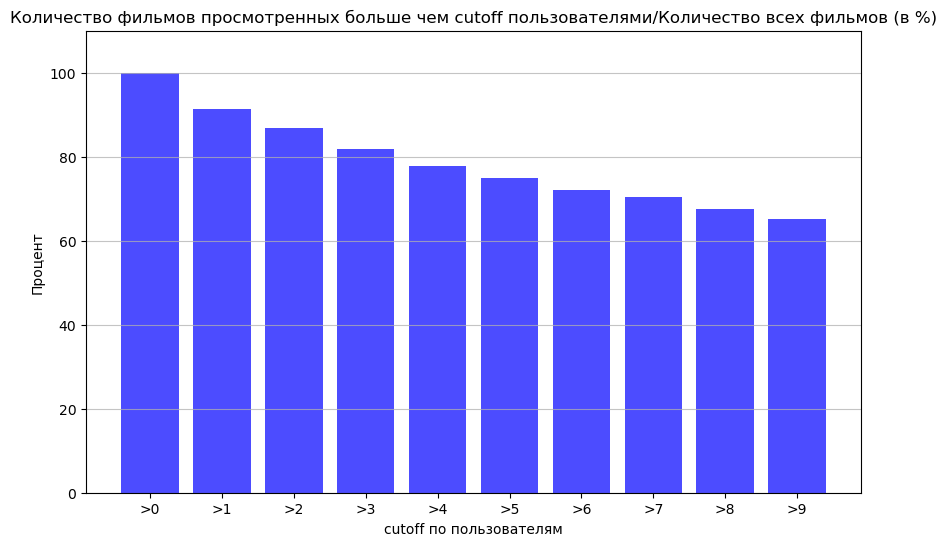

In [23]:
# Данные для гистограммы

# Преобразуем данные в проценты
percentages = [value * 100 for value in The_percentage_of_the_item_is_higher_than_cutoff]

# Индексы для каждого значения
indices = np.arange(len(percentages))

# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.bar(indices, percentages, color='blue', alpha=0.7)

# Настройка заголовка и меток осей
plt.title('Количество фильмов просмотренных больше чем cutoff пользователями/Количество всех фильмов (в %)')
plt.xlabel('cutoff по пользователям')
plt.ylabel('Процент')

# Настройка меток по оси X
plt.xticks(indices, [f'>{i}' for i in indices])

# Показать гистограмму
plt.grid(axis='y', alpha=0.75)
plt.ylim(0, 110)  # Устанавливаем пределы по оси Y
plt.show()

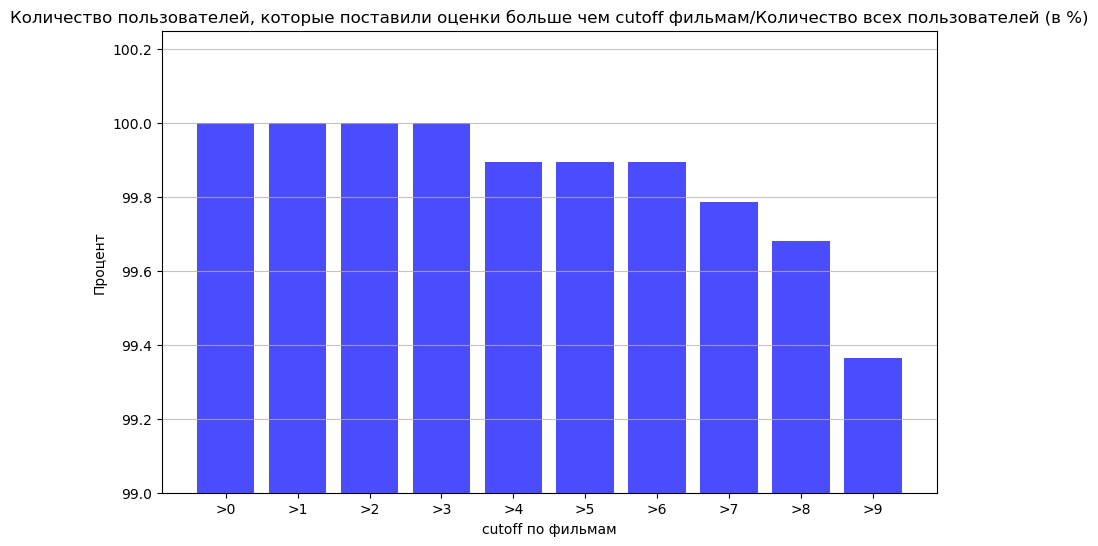

In [24]:
# Данные для гистограммы

# Преобразуем данные в проценты
percentages = [value * 100 for value in The_percentage_of_the_user_is_higher_than_cutoff]

# Индексы для каждого значения
indices = np.arange(len(percentages))

# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.bar(indices, percentages, color='blue', alpha=0.7)

# Настройка заголовка и меток осей
plt.title('Количество пользователей, которые поставили оценки больше чем cutoff фильмам/Количество всех пользователей (в %)')
plt.xlabel('cutoff по фильмам')
plt.ylabel('Процент')

# Настройка меток по оси X
plt.xticks(indices, [f'>{i}' for i in indices])

# Показать гистограмму
plt.grid(axis='y', alpha=0.75)
plt.ylim(99, 100.25)  # Устанавливаем пределы по оси Y
plt.show()

#### Вывод:   
1) Берём всех пользователей, поскольку большинство из них (99,3%) поставило оценку более 10 фильмам    
2) Убираем фильмы, которые посмотрели <5 пользователей  

In [25]:
cutoff_item_counts_per_user = 4

filtered_item_ids = item_counts_per_user[item_counts_per_user > cutoff_item_counts_per_user].index

In [26]:
print(f"N users before: {interactions_df.user_id.nunique()}")
print(f"N items before: {interactions_df.item_id.nunique()}\n")

interactions_df = interactions_df[interactions_df.item_id.isin(filtered_item_ids)]

print(f"N users after: {interactions_df.user_id.nunique()}")
print(f"N items after: {interactions_df.item_id.nunique()}")

N users before: 943
N items before: 1650

N users after: 943
N items after: 1283


#### После различных фильтраций оставим user и item которые есть во всех датасетах в таблицах:  
items_ohe_df - инфа про фильмы  
users_ohe_df - инфа про юзеров  
interactions_df - таблица взаимодействий  

После фильтрации может получиться так, что некоторые айтемы/юзеры есть в датасете взаимодействий, но при этом они отсутствуют в датасетах айтемов/юзеров или наоборот. Поэтому найдем id айтемов и id юзеров, которые есть во всех датасетах и оставим только их.

In [27]:
common_items = set(interactions_df.item_id.unique()).intersection(set(items_ohe_df.item_id.unique()))
common_users = set(interactions_df.user_id.unique()).intersection(set(users_ohe_df.user_id.unique()))

print("Кол-во общих пользователей: ", len(common_users))
print("Кол-во общих продуктов: ", len(common_items))

interactions_df = interactions_df[interactions_df.item_id.isin(common_items)]
interactions_df = interactions_df[interactions_df.user_id.isin(common_users)]

items_ohe_df = items_ohe_df[items_ohe_df.item_id.isin(common_items)]
users_ohe_df = users_ohe_df[users_ohe_df.user_id.isin(common_users)]

Кол-во общих пользователей:  943
Кол-во общих продуктов:  1283


#### Создадим uid и iid  
внутренние индексы для user_id и item_id по порядку от 0,1,2,3 и так далее  

Это делаетя для того, чтобы потом создать матрицу взаимодействий и чтобы uid и iid соответствовали столбцам матрицы  
Пояснение: user_id может быть 123123432532432, но у нас в матрице он будет всего лишь на 5232 месте по порядку

In [28]:
interactions_df["uid"] = interactions_df["user_id"].astype("category")
interactions_df["uid"] = interactions_df["uid"].cat.codes

interactions_df["iid"] = interactions_df["item_id"].astype("category")
interactions_df["iid"] = interactions_df["iid"].cat.codes

print(sorted(interactions_df.uid.unique())[:5])
print(sorted(interactions_df.iid.unique())[:5])
interactions_df.head()

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


,user_id,item_id,rating,timestamp,uid,iid
0,1,1,5,1997-09-22 22:02:38,0,0
1,1,2,3,1997-10-15 05:26:11,0,1
2,1,3,4,1997-11-03 07:42:40,0,2
3,1,4,3,1997-10-15 05:25:19,0,3
4,1,5,3,1998-03-13 01:15:12,0,4


### Итоговая матрица взаимодействий

In [29]:
# Создаем разреженную матрицу
num_users = len(common_users)
num_items = len(common_items)

# Получаем соответствующие user_ids и item_ids для создания матрицы
user_ids = interactions_df['uid']
item_ids = interactions_df['iid']
ratings = interactions_df['rating'].values

ui_matrix_Train = csr_matrix((ratings, # одномерный массив рейтингов
                              (user_ids, item_ids)), # (одномерный массив рейтингов uid,одномерный массив рейтингов iid)
                             shape=(num_users, num_items), # количество уникальных users, количество уникальных items
                             dtype=int)

interactions_vec = ui_matrix_Train.toarray()

In [30]:
# фактическая матрица
ratings_matrix = ui_matrix_Train.astype(float)

In [31]:
# Проверим себя ещё раз
print(interactions_df.item_id.nunique()) # количество уникальных item_id в таблице взаимодействий
print(items_ohe_df.item_id.nunique()) # количество уникальных item_id в таблице взаимодействий
print(interactions_df.user_id.nunique()) # количество уникальных item_id в таблице взаимодействий
print(users_ohe_df.user_id.nunique()) # количество уникальных item_id в таблице взаимодействий

set(items_ohe_df.item_id.unique()) - set(interactions_df.item_id.unique())

1283
1283
943
943


set()

### Создание словарей id-шников   
Для того, чтобы можно было удобно превратять соответствие iid/uid в item_id/user_id и наоборот соберем словари 

{iid: item_id}, {uid: user_id} и {item_id: iid}, {user_id: uid}.

In [32]:
iid_to_item_id = interactions_df[["iid", "item_id"]].drop_duplicates().set_index("iid").to_dict()["item_id"]
item_id_to_iid = interactions_df[["iid", "item_id"]].drop_duplicates().set_index("item_id").to_dict()["iid"]

uid_to_user_id = interactions_df[["uid", "user_id"]].drop_duplicates().set_index("uid").to_dict()["user_id"]
user_id_to_uid = interactions_df[["uid", "user_id"]].drop_duplicates().set_index("user_id").to_dict()["uid"]

И проиндексируем датасеты users_ohe_df и items_ohe_df по внутренним айди:

In [33]:
items_ohe_df["iid"] = items_ohe_df["item_id"].apply(lambda x: item_id_to_iid[x])
items_ohe_df = items_ohe_df.set_index("iid")

users_ohe_df["uid"] = users_ohe_df["user_id"].apply(lambda x: user_id_to_uid[x])
users_ohe_df = users_ohe_df.set_index("uid")

## 2 Построение моделей

### 2.1 Двухэтапная модель

### 2.1.1 Первый этап. Коллаборативная фильтрация

### 2.1.1.1 SVD

#### Теория

#### 1) Создаём матрицу, которую получили из элементов SVD разложения пониженной размерности.

Получаем эквивалентную матрицу такой же размерности (943, 1283):
$A \approx A_{New} = U \Sigma V^{T}$

1.1) Рассчитываем матрицу ATA

$ATA = A*A^{T}$

1.2) Рассчитываем собственные значения и собственные вектора матрицы  

$Ф_{A}(λ) = |ATA-λE| = 0$  
$AV_{i} = λ_{i}V{i}$ ($V_{i}$≠0), $V_{i}$ - собственный вектор,    

1.3) Сортируем собственные вектора по собественным значениям в убывающем порядке  
1.4) Выбираем k собственных векторов, образуется новое k-мерное пространство  

$A \approx U \Sigma V^{T}$  

$U_k \in R^{m x k}$ - столбцы - собственные вектора делить на соответствующие собственные значения (0.2/$\sqrt{2.0}$)  
$V_k \in R^{n x k}$ - строки - собственные вектора, соотвественно $V^{T} = E^{T}$    
$\Sigma_k \in R^{k x k}$  - собственные значения под корнем по диагонали, остальные нули  

#### 2) Берём топ 100 фильмов для каждого  пользователя

Для каждого пользователя убираем фильмы, которые пользователь уже оценил берём топ 100 оценок из этих фильмов

In [34]:
from scipy.sparse.linalg import svds

In [35]:
# k - это количество сингулярных значений, которые нужно оставить (например, 100)
U, sigma, Vt = svds(ratings_matrix.toarray(), k=100)

In [36]:
print(interactions_vec.shape)
print(U.shape)

(943, 1283)
(943, 100)


In [37]:
# Восстанавливаем приближенную матрицу рейтингов
ratings_matrix_SVD = np.dot(U, np.dot(np.diag(sigma), Vt))
print(ratings_matrix.shape)
ratings_matrix_SVD[:5]

(943, 1283)


array([[ 4.32827111e+00,  1.50542901e+00,  1.39149626e+00, ...,
         5.31950557e-03,  9.70888366e-02,  2.97259238e-01],
       [ 3.29668794e+00,  1.99659388e-02, -1.99533391e-01, ...,
         3.32442235e-05, -5.76782651e-02, -5.22878752e-02],
       [-5.57099546e-01, -1.91725008e-01, -2.40215882e-01, ...,
         6.26954141e-02,  1.44848627e-02,  3.32648341e-02],
       [-1.59262093e-03,  8.31925294e-02,  7.74306394e-02, ...,
         1.02179586e-01,  6.97293531e-02,  1.77783641e-02],
       [ 1.86999763e+00,  6.53338629e-01,  2.36889175e-01, ...,
         8.99038328e-02,  2.60176592e-01,  1.32074615e-01]])

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [38]:
name_method = 'SVD'

# Количество фильмов, которые будем включать в топ
k = num_items  # или другое значение, если вам нужно меньше фильмов

# Словарь для хранения рекомендаций
user_recommendations = []

# Проходим по каждому пользователю
for user_id in range(num_users):
    # Предсказанные оценки для всех фильмов
    user_predicted_scores = ratings_matrix_SVD[user_id]

    # Находим индексы топ-фильмов по предсказанным оценкам
    top_indices = np.argsort(user_predicted_scores)[-k:][::-1]
    
    # Соответствующие id для этих фильмов
    top_movies_id = [iid_to_item_id[i] for i in top_indices]
    top_scores = user_predicted_scores[top_indices]
    
    list_per_user = list(map(list,zip(len(top_indices)*[user_id+1],
                               top_movies_id,
                               list(top_scores),
                                list(range(1,len(top_indices)+1)))))
    
    user_recommendations+=list_per_user
# Преобразуем результат в DataFrame
recommendations_df_SVD_ALL = pd.DataFrame(user_recommendations, columns = ['user_id',
                                                                           'item_id',
                                                                           'pred ' + name_method,
                                                                           'rank ' + name_method])

In [39]:
print(recommendations_df_SVD_ALL.shape)
recommendations_df_SVD_ALL.head()

(1209869, 4)


,user_id,item_id,pred SVD,rank SVD
0,1,15,6.272210,1
1,1,50,5.925379,2
2,1,269,5.607073,3
3,1,127,5.456930,4
4,1,9,5.436287,5


### 2.1.1.2 Implicit KNN

In [40]:
import implicit

In [41]:
# Пропишем ф-ию на вход которой подают модель и она возвращает пандас файл с user_id и top_movie_ids(список ids)

def result_table_by_KNN_method(model, name_method, num_users, N):
    # Пустой список для хранения рекомендаций для каждого пользователя
    recommendations_list = []
    
    user_id_list = []
    scores_list = []
    top_movie_ids_list = []
    rank_list = []
    # Проходим по каждому пользователю и получаем рекомендации
    for user_id in range(num_users):
        
        # Получаем топ рекомендаций для пользователя
        recommended_items, scores = model.recommend(user_id, ratings_matrix[user_id], N)

        user_id_list+= len(scores)*[user_id+1]
        top_movie_ids_list+= [iid_to_item_id[i] for i in recommended_items]
        scores_list+= list(scores)
        rank_list+=list(range(1,len(scores)+1))
    
    recommendations_list = list(map(list,zip(user_id_list,
                           top_movie_ids_list,
                           scores_list,
                           rank_list)))

    # Преобразуем результат в DataFrame
    recommendations_df_ALL = pd.DataFrame(recommendations_list, columns = ['user_id',
                                                                               'item_id',
                                                                               'pred ' + name_method,
                                                                               'rank ' + name_method])
    return recommendations_df_ALL

#### Теория

1) Рассчитываем матрицу сходства (similarity) между фильмами  

Если, фильмов у нас 50, пользователей 1000, значит вектор фильма будет состоять из 1000 компонент  

Между каждой парой фильмов (между каждой пары вектрово из 1000 компонент) рассчитываем расстояние  

Таким образом получаем matrix_similarity размером 50 на 50  

, где matrix_similarity[i][j] будет означать, насколько похожи i-ый и j-ый фильм,    

то есть каждое значение matrix_similarity[i][j] - расстояние между i-м и j-м фильмом   

Расстояние считаем одним из трёх способов:  

A) Cosine  
B) BM25  
C) TFIDF  

2) У матрицы similarity оставляем только N самых больших значений, остальное зануляем, то есть если N = 2, то матрица будет такой:  

$sim\_matrix$ =   
[[1.  , 0.33, 0.  , 0.  , 0.  ],  
[0.  , 1.  , 0.  , 0.  , 0.57],  
[0.  , 0.  , 1.  , 0.33, 0.  ],  
[0.  , 0.  , 0.33, 1.  , 0.  ],  
[0.  , 0.57, 0.  , 0.  , 1.  ]]   

3) Формируем матрицу предсказанных рейтингов для фильма:  

$pred\_ui\_matrix[i][j] = \sum\limits_{j=1}^{n} {ui\_matrix\_Train[i][j]*sim\_matrix[i][j]}$  

**Пример:**  

Вектор пользователя:  
$ui\_matrix\_Train[0] = [0, 3, 0, 3, 3]$  

Матрица схожести фильмов:  

$sim\_matrix$ =  
[[1.   0.33 0.   0.   0.24]  
 [0.33 1.   0.29 0.29 0.57]  
 [0.   0.29 1.   0.33 0.32]  
 [0.   0.29 0.33 1.   0.32]  
 [0.24 0.57 0.32 0.32 1.  ]]   
 
$pred\_ui\_matrix[0][0] = 0*1+3*0.33*+0*0+3*0+3*0.24 = 1.71$  

Если перебрать все фильмы для данного пользователя, то получим следующий вектор:  
$pred\_for\_User\_0 = [1.734311808837787,\ 0,\ 2.853017566952774,\ 0,\ 0]$  

4) Зануляем те фильмы, которые пользователь уже оценил  
5) Берём топ K фильмов с самыми высокими значениями из матрицы $pred\_ui\_matrix$ и получаем топ K фильмов для рекомендации  

### 2.1.1.2.1 CosineRecommender

#### Косинусное сходство:  

$Cosine Similarity(A,B) = \frac{A*B}{||A||*||B||}$   

A⋅B — скалярное произведение векторов  
∥A∥ и ∥B∥ — длины (нормы) векторов.  

**Пример:**    
$Cosine Similarity([1,2,3],[4,5,6]) = \frac{1*4+2*5+3*6}{\sqrt{1^{2}+2^{2}+3^{2}}* \sqrt{4^{2}+5^{2}+6^{2}}}$  

In [42]:
K=100

cosine_model = implicit.nearest_neighbours.CosineRecommender(K)
cosine_model.fit(ratings_matrix)

C:\Users\Rinat\AppData\Roaming\Python\Python311\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0011734962463378906 seconds
  warnings.warn(


  0%|          | 0/1283 [00:00<?, ?it/s]

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [43]:
N = num_items

recommendations_df_KNN_Cos_ALL = result_table_by_KNN_method(cosine_model, 'KNN_cos',num_users, N)
print(recommendations_df_KNN_Cos_ALL.shape)
recommendations_df_KNN_Cos_ALL.head()

(678823, 4)


,user_id,item_id,pred KNN_cos,rank KNN_cos
0,1,174,161.140696,1
1,1,56,145.999751,2
2,1,98,143.868371,3
3,1,69,137.824613,4
4,1,210,133.065561,5


### 2.1.1.2.2 BM25Recommender

#### Теория

Матрица similarity:  

**$bm25\ weight_{ij}$**  

Берём каждое значение матрицы user-item и при помощи различных коэффициентов  
1) 𝑙𝑒𝑛𝑔𝑡ℎ_𝑛𝑜𝑟𝑚 нормируем значение по юзеру (насколько часто и насколько большие баллы он ставил фильмам)  
2) Умножаем еще на долю оценок что получил фильм  

$bm25\ weight_{ij} = \frac{a[i][j]*(K1 +1)}{(K1*length\_norm[i] + a[i][j])}*IDF[j]$  

i - user   
j - movie  

**K1=100, B=0.75** - гипер параметры, отвечающие за влияние 𝑙𝑒𝑛𝑔𝑡ℎ_𝑛𝑜𝑟𝑚 на матрицу similarity  


**$IDF_{movie}$**

В широком смысле IDF - log(количество документов/количество документов со словом t)    

В нашем смысле - доля фильмов с оценками среди всех фильмов  

$IDF_{movie}$ - "логарифм от количества всех фильмов" - "логарифм от количества оценок в фильме, который пользователь оценил + 1"

количество оценок в фильме, пользователь оценил = количество ненулевых значений  

$IDF_{movie} = log(count\ all\ movies) - log(1+count\ of\ ratings\ in\ the\ movie\ that\ the\ user\ rated)$   

**Вычисление нормировки длины (length_norm)**

Конструкция (1-B) + B*() означает что на коэффициент B при применяем нормировку, если B=0.75, значит применяем нормировку на 75% 
Смысл этой нормировки состоит в том, чтобы создать вектор с элементами схожего масштаба, где если юзер ставил много  оценок и они были большими то элемент нормировки будет большим, если мало и низкие оценки, то маленьким:

**Пример:**  

сумма оценко фильмов по каждому пользователю: [ 6 16  8  8 13]  
средяя этих оценок: 10.2  
вектор сумм оценок поделенный на среднее: array([0.69, 1.43, 0.84, 0.84, 1.21])   

$length\ norm\ user$ = (1-B) + B*(сумма всех оценок юзера)/(среднее от сумм оценок по всем юзерам)  

$length\ norm\ user = (1-B) +B * \frac{\sum\limits_{i=1}^{N}a_{i\ user}}{(\sum\limits_{i=1}^{N} \sum\limits_{j=1}^{M} a_{i\ j})\ /N}$  



In [44]:
K=100

BM25_model = implicit.nearest_neighbours.BM25Recommender(K)
BM25_model.fit(ratings_matrix)

C:\Users\Rinat\AppData\Roaming\Python\Python311\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009944438934326172 seconds
  warnings.warn(


  0%|          | 0/1283 [00:00<?, ?it/s]

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [45]:
N = num_items

recommendations_df_KNN_BM25_ALL = result_table_by_KNN_method(BM25_model, 'KNN_BM25',num_users, N)
print(recommendations_df_KNN_BM25_ALL.shape)
recommendations_df_KNN_BM25_ALL.head()

(457236, 4)


,user_id,item_id,pred KNN_BM25,rank KNN_BM25
0,1,174,197731.239114,1
1,1,100,187858.482247,2
2,1,98,180658.460015,3
3,1,56,176595.145456,4
4,1,69,167594.616074,5


### 2.1.1.2.3 TFIDFRecommender

**1) tfidf_weight**   

Норимурем значения матрицы с учётом того сколько у фильма оценок

$IDF_{movie}$ - "логарифм от количества всех фильмов" - "логарифм от количества оценок в фильме, который пользователь оценил + 1"
$IDF_{movie} = log(count\ all\ movies) - log(1+count\ of\ ratings\ in\ the\ movie\ that\ the\ user\ rated)$     

$tfidf\_weight\_matrix[i][j] = \sqrt{a[i][j]}*IDF[j]$  

i - user  
j - movie   

**2) normalize**   

Далее нормализуем возведя каждый элемент матрицы tfidf в квадрат и после чего ещё делим это значение на сумму всех элементов матрицы tfidf по соответствующему юзеру  
$normalize\_matrix[i][j] = \frac{tfidf\_weight\_matrix[i][j]^{2}}{sum(tfidf\_weight\_matrix[i])}$  

**3) Similarity matrix**  
$TFIDF\_model\_sim\_model = norm\_matrix*norm\_matrix.T$

In [46]:
K=100

TFIDF_model = implicit.nearest_neighbours.TFIDFRecommender(K)
TFIDF_model.fit(ratings_matrix)

C:\Users\Rinat\AppData\Roaming\Python\Python311\site-packages\implicit\utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0015096664428710938 seconds
  warnings.warn(


  0%|          | 0/1283 [00:00<?, ?it/s]

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [47]:
N = num_items

recommendations_df_KNN_TFIDF_ALL = result_table_by_KNN_method(TFIDF_model,'KNN_TFIDF',num_users, N)
print(recommendations_df_KNN_TFIDF_ALL.shape)
recommendations_df_KNN_TFIDF_ALL.head()

(689343, 4)


,user_id,item_id,pred KNN_TFIDF,rank KNN_TFIDF
0,1,174,119.494093,1
1,1,69,108.484640,2
2,1,56,104.172755,3
3,1,98,100.984482,4
4,1,210,98.342824,5


### 2.1.1.3 ALS (Alternating Least Squares)  

In [48]:
from pyspark.sql import functions as F

#### Теория

Библиотека implicit позволяет эффективно работать с неявными данными, используя веса уверенности для каждого взаимодействия.

ALS — это стандартный алгоритм матричной факторизации, который работает с явными рейтингами (explicit ratings), когда пользователи явно оценивают предметы, например, дают оценки фильмам от 1 до 5.    

iALS — это модификация ALS, которая предназначена для работы с неявными данными (implicit data). Такие данные не содержат явных оценок, но включают информацию о взаимодействиях пользователей с предметами, например, просмотренные фильмы, купленные товары, прослушанные треки и т.д.  

**Алгоритм:**  
1) Раскладываем матрицу user-item на 2 матрицы  
2) Далее из этих 2-х матриц составляем начальную матрицу путём их произведения, это и есть искомая preiction матрица  
3) В этой матрице выбираем максимальные оценки для каждого пользователя  

Вот более детальный алогиртм:

**Как считаются матрицы X и Y?**  
**Итерационно обновляем матрицы X и Y**  

**Сам алгоритм:**  
1) Есть ф-я ошибки $L(X,Y)$, она < некого  порога? Да -> останавливаем пересчёт матриц X и Y, нет-> идём к пунктам ниже  
2) $x_{u}$ - пересчитываем матрицу по формуле ниже    
3) $y_{i}$ - пересчитываем матрицу по формуле ниже  
4) Возвращаемся к пункту 1 с обновлёнными матрицами X и Y  

$R_{m × n} ≈ X^{T}_{k × m}*Y_{k × n}$  


X — это матрица пользователей размером k×m  
𝑌 - это матрица айтемов размером k×n.   
k — это количество скрытых факторов.  
<br>   

**Функция ошибки:**    
$L(X,Y)  = \sum{(r_{ui}-x^{T}_{u}y_{i})^{2}} + λ(|x_{u}^{2}| + |y_{i}^{2}|)$   
u,i - координатый матриц, u-пользователь, i - айтем  
λ - шаг,  
$|x_{u}^{2}| + |y_{i}^{2}|$ - модули значений матриц X и Y в точках u и i  



<br>   
$\frac{∂L(X,Y)}{∂x_{u}}=0$    

$x_{u} = (Y_{k × n}Y_{k × n}^{T}+λE)^{-1}Y_{k × n}r_{u}$   

$r_{u}$ - вектор оценок пользователя   
<br>  
$\frac{∂L(X,Y)}{∂y_{i}}=0$  
$y_{i} = (X_{k × m}X_{k × m}^{T}+λE)^{-1}X_{k × m}r_{i}$  

$r_{i}$ - вектор оценок айтема   

**Пример:**  
u = 0 (id юзера), i = 0 (id пользователя), r_{ui} = 5 (оценка фильма)  
матрицы X и Y подбираются в процессе обучения и изначально они имеют какое-нибудь значение, пусть  

$X_{0} = [0.5, 0.3], Y_{0} = [0.3, 0.4]$

Значение ошибки $L(X,Y)$ для одной координаты ui:  
$L(X,Y)_{ui} = (r_{ui}-x^{T}_{u}y_{i})^{2}  + λ(|x_{u}^{2}| + |y_{i}^{2}|) = {(5 − 0.5⋅0.6+0.3⋅0.4)}^2 + 0.1*({∣0.5∣}^2+{∣0.6∣}^2+{∣0.3∣}^2+{∣0.4∣}^2)$   
и так мы считаем ошибку по всем координатам и складываем её, алгоритм продолжается до тех пор, пока не ошибка не станет ниже некого порога  

In [49]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS

# Создаём SparkSession
spark = SparkSession.builder \
    .appName("ALSExample") \
    .getOrCreate()

In [50]:
spark_df = spark.createDataFrame(interactions_df[['uid', 'iid', 'rating']])

In [51]:
als = ALS(userCol='uid', itemCol='iid', ratingCol='rating', coldStartStrategy='drop')
model_ALS = als.fit(spark_df)

In [52]:
all_user_item_combinations = spark_df.select('uid').distinct().crossJoin(
    spark_df.select('iid').distinct()
)

recommendations_df_ALS_ALL = model_ALS.transform(all_user_item_combinations)
recommendations_df_ALS_ALL = recommendations_df_ALS_ALL.toPandas()

In [53]:
spark.stop()

In [54]:
print(recommendations_df_ALS_ALL.shape)
recommendations_df_ALS_ALL.head()

(1209869, 3)


,uid,iid,prediction
0,26,463,4.047824
1,29,463,3.820035
2,65,463,3.836540
3,19,463,1.609700
4,54,463,2.587162


#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [55]:
recommendations_df_ALS_ALL['user_id'] = recommendations_df_ALS_ALL['uid'].map(uid_to_user_id)
recommendations_df_ALS_ALL['item_id'] = recommendations_df_ALS_ALL['iid'].map(iid_to_item_id)

recommendations_df_ALS_ALL.drop(['uid', 'iid'], axis=1, inplace=True)
recommendations_df_ALS_ALL['pred ALS'] = recommendations_df_ALS_ALL['prediction']
recommendations_df_ALS_ALL.drop(['prediction'], axis=1, inplace=True)

recommendations_df_ALS_ALL = recommendations_df_ALS_ALL.sort_values(['user_id', 'pred ALS'], ascending=[True, False])
recommendations_df_ALS_ALL['rank ALS'] = recommendations_df_ALS_ALL.groupby('user_id')['pred ALS'].rank(ascending=False, method='first').astype(int)

recommendations_df_ALS_ALL = recommendations_df_ALS_ALL.reset_index(drop=True)

recommendations_df_ALS_ALL.head()

,user_id,item_id,pred ALS,rank ALS
0,1,1449,4.937941,1
1,1,408,4.895823,2
2,1,169,4.782387,3
3,1,1233,4.773246,4
4,1,921,4.676255,5


### 2.1.1.4 LightFM

LightFM сочетает в себе два подхода:  

**Коллаборативная фильтрация:** Использует оценки пользователей для предсказания оценок других пользователей, основываясь на их сходстве.

**Контентная фильтрация:** Учитывает информацию о пользователях и предметах, используя их признаки (например, текстовое описание, жанр, категория и т. д.) для улучшения рекомендаций.  

Я применил logistic функцию для 0 и 1, а вообще здесь нужно применять другую ф-ю потерь

Основная идея что появляются матрицы **User-Feature** и **Item-Feature**  
Обучаем вектора для каждого отдельного признака  
Пользователя или объектов представляем как сумму объектов его признаков  

 **Модель одна, с разными loss:**    
 ● Logistic  
 ● Bayesian Personalized Ranking  
 ● Weighted Approximate-Rank Pairwise  
 ● k-os WARP  
 Обучается с помощью SGD. Доступны две вариации:  
 ● adagrad  
 ● adadelta  

$R_{pred} = σ(X⋅Y^{T} + b_{U} + b_{I})$ - матрица предсказаний, $b_{U} + b_{I}$ - вектора

$\hat{r}_{ui} ≈ σ(x_{u}⋅y_{i} + b_{u} + b_{i})$  

$\hat{r}_{ui}$ — оценка пользователя u   
$x_{u}$ — вектор признаков пользователя  
$y_{i}$ — вектор признаков предмета  
$x_{u}⋅y_{i}$ - простое скалярное произведение векторов  

$b_{u},b_{i}$  — смещения (bias) для пользователей и предметов соответственно. ($b_{u},b_{i}$ - числа)

$L(e^{u}, e^{I}, b^{u}, b^{I}) = П\ \hat{r}_{ui}⋅П\ (1-\hat{r}_{ui})$

$L(X,Y)  = \sum{(r_{ui}-x^{T}_{u}y_{i} - b_{u} - b_{i})^{2}} + λ(|x_{u}^{2}| + |y_{i}^{2}|)$   

In [56]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

from scipy.sparse import coo_matrix

C:\ProgramData\anaconda3\Lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [57]:
lfm_model = LightFM(no_components=64, learning_rate=0.05,loss='logistic', max_sampled=5, random_state=np.random.RandomState(50))
lfm_model.fit(ratings_matrix, epochs=15, num_threads=1)

#### Для каждого пользователя находим Ранг фильмы из всех фильмов что есть

In [58]:
N = num_items
name_method = 'LightFM'

recommendations_list = []

user_id_list = []
scores_list = []
top_movie_ids_list = []
rank_list = []

# Проходим по каждому пользователю (например, user_ids — это список ID пользователей)
for user_id in range(num_users):
    
    scores = lfm_model.predict(user_id, np.arange(num_items))
    top_items = np.argsort(scores)[-N:][::-1]
    top_movie_ids = [iid_to_item_id[i] for i in top_items]
    
    user_id_list+= len(top_indices)*[user_id+1]
    scores_list+= list(scores[top_items])
    top_movie_ids_list+= top_movie_ids
    rank_list+=list(range(1,len(scores)+1))

recommendations_list = list(map(list,zip(user_id_list,
                       top_movie_ids_list,
                       scores_list,
                       rank_list)))

# Преобразуем результат в DataFrame
recommendations_df_LightFM_ALL = pd.DataFrame(recommendations_list, columns = ['user_id',
                                                                           'item_id',
                                                                           'pred ' + name_method,
                                                                           'rank ' + name_method])

In [59]:
print(recommendations_df_LightFM_ALL.shape)
recommendations_df_LightFM_ALL.head()

(1209869, 4)


,user_id,item_id,pred LightFM,rank LightFM
0,1,50,5.185716,1
1,1,258,5.105276,2
2,1,286,5.097438,3
3,1,294,5.086987,4
4,1,288,5.065082,5


### 2.1.2 Второй этап. Улучшение модели ранжирования. LGBMRanker()

**Что делаем?**  
1) Соединяем всевозможные данные из всех таблиц по всем комбинациям user_id и item_id в одну большую, чтобы далее признаки были одинаковыми и удобно было считать метрики.  
То есть не было такого, что в Train есть столбец "occupation_writer" после one-hot-encoding, а в Test, его нет или наоборот  	
2) Обучаем модель на Train  
3) Рассчитываем предсказания для всей выборки (100000 строк)  

#### 2.1.2.1 Строим большую таблицу Big_Table, куда собираем всю информацию по всем возможным user_id и item_id  

Для каждого user_id и item_id  
1) Инфа взаимодействий  
2) Инфа о пользователе  
3) Инфа о продукте  
4) Инфа о результатах применения моделей (prediction и rank) 

Заготавливаем всевозможные варианты user_id - item_id

In [60]:
user_id_list = sorted(interactions_df.user_id.unique())
item_id_list = sorted(interactions_df.item_id.unique())

user_id_item_id_List = []
for user_id in user_id_list:
    for item_id in item_id_list:
        user_id_item_id_List.append([user_id,item_id])

Big_Table = pd.DataFrame(user_id_item_id_List,columns = ['user_id','item_id'])

Соединяем выборки Train и Test, создавая колонку Sample где будем указывать какая это выборка

In [61]:
data_Train['Sample'] = 'Train'
data_Test['Sample'] = 'Test'

data_All = pd.concat([data_Train, data_Test], ignore_index=True)
print(data_All.shape)
data_All.head()

(100000, 5)


,user_id,item_id,rating,timestamp,Sample
0,1,1,5,1997-09-22 22:02:38,Train
1,1,2,3,1997-10-15 05:26:11,Train
2,1,3,4,1997-11-03 07:42:40,Train
3,1,4,3,1997-10-15 05:25:19,Train
4,1,5,3,1998-03-13 01:15:12,Train


#### "Джоиним" все данные

In [62]:
# join interraction info
Big_Table = pd.merge(Big_Table,
                     data_All[['user_id','item_id','rating','Sample']],
                     on=['user_id','item_id'], how='left')

Big_Table['Sample'] = Big_Table['Sample'].fillna('No interaction')

# join movie info
Big_Table = pd.merge(Big_Table,
                            items_ohe_df,
                            on='item_id', how='left')

# join user info
Big_Table = pd.merge(Big_Table,
                             user_data[['user_id','age','gender','occupation']],
                             on='user_id', how='left')

Big_Table = Big_Table.sort_values(by='user_id').reset_index(drop=True)
Big_Table = Big_Table.replace({'F': 0, 'M': 1})

Big_Table = pd.get_dummies(Big_Table, columns=['occupation'], dtype=int).reset_index(drop=True)

print(Big_Table.shape)
Big_Table.head()

(1209869, 90)


,user_id,item_id,rating,Sample,number of days after the release,unknown,action,adventure,animation,children,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,1,5.0,Train,0.043308,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1,899,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,898,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,896,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,895,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Прикрепляем результаты моделей из 1-го этапа

In [63]:
print(recommendations_df_SVD_ALL.shape)
print(recommendations_df_KNN_Cos_ALL.shape)
print(recommendations_df_KNN_BM25_ALL.shape)
print(recommendations_df_KNN_TFIDF_ALL.shape)
print(recommendations_df_ALS_ALL.shape)
print(recommendations_df_LightFM_ALL.shape)

(1209869, 4)
(678823, 4)
(457236, 4)
(689343, 4)
(1209869, 4)
(1209869, 4)


In [64]:
# Начинаем с первого датафрейма и последовательно добавляем остальные
first_stage_result_df = recommendations_df_SVD_ALL

# Объединяем с каждым из других датафреймов по 'user_id' и 'item_id'
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_KNN_Cos_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_KNN_BM25_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_KNN_TFIDF_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_ALS_ALL, on=['user_id', 'item_id'], how='outer')
first_stage_result_df = pd.merge(first_stage_result_df, recommendations_df_LightFM_ALL, on=['user_id', 'item_id'], how='outer')

# в столбцах pred у KNN заменяю пустоты на 0
Null_pred_columns = ['pred KNN_cos','pred KNN_BM25','pred KNN_TFIDF']
first_stage_result_df[Null_pred_columns] = first_stage_result_df[Null_pred_columns].fillna(0)

# Нормируем столбцы pred (val/(max-min))

first_stage_pred_columns = ['pred SVD', 'pred KNN_cos', 'pred KNN_BM25', 'pred KNN_TFIDF', 'pred ALS', 'pred LightFM']

for column in first_stage_pred_columns:
    max_val = first_stage_result_df[column].max()
    min_val = first_stage_result_df[column].min()
    # Нормируем значения столбца по формуле val/(макс-мин)
    first_stage_result_df[column] = first_stage_result_df[column].apply(
        lambda x: (x - min_val) / (max_val - min_val) if pd.notnull(x) else np.nan
    )

# В столбцах rank у KNN Заменяем пустоты на num_items = 1283

Null_rank_columns = ['rank KNN_cos', 'rank KNN_BM25', 'rank KNN_TFIDF']
first_stage_result_df[Null_rank_columns] = first_stage_result_df[Null_rank_columns].fillna(1283)

# Проверка итогового датафрейма
print(first_stage_result_df.shape)
first_stage_result_df.head()

(1209869, 14)


,user_id,item_id,pred SVD,rank SVD,pred KNN_cos,rank KNN_cos,pred KNN_BM25,rank KNN_BM25,pred KNN_TFIDF,rank KNN_TFIDF,pred ALS,rank ALS,pred LightFM,rank LightFM
0,1,15,0.859277,1,0.0,1099.0,0.0,729.0,0.0,1144.0,0.621688,614,0.661129,32
1,1,50,0.826677,2,0.0,1077.0,0.0,707.0,0.0,1122.0,0.755638,29,0.762280,1
2,1,269,0.796759,3,0.0,981.0,0.0,611.0,0.0,1026.0,0.715820,147,0.684772,19
3,1,127,0.782647,4,0.0,1045.0,0.0,675.0,0.0,1090.0,0.769932,10,0.709583,11
4,1,9,0.780707,5,0.0,1102.0,0.0,732.0,0.0,1147.0,0.691955,273,0.666760,26


In [65]:
# Таблица Рангов
Big_rank_Table = first_stage_result_df[['user_id','item_id','rank SVD','rank KNN_cos','rank KNN_BM25','rank KNN_TFIDF','rank ALS','rank LightFM']].copy()
Big_rank_Table['rank KNN_cos'] = Big_rank_Table['rank KNN_cos'].astype(int)
Big_rank_Table['rank KNN_BM25'] = Big_rank_Table['rank KNN_BM25'].astype(int)
Big_rank_Table['rank KNN_TFIDF'] = Big_rank_Table['rank KNN_TFIDF'].astype(int)
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 8)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM
0,1,15,1,1099,729,1144,614,32
1,1,50,2,1077,707,1122,29,1
2,1,269,3,981,611,1026,147,19
3,1,127,4,1045,675,1090,10,11
4,1,9,5,1102,732,1147,273,26


In [66]:
# Таблица pred
Big_pred_Table = first_stage_result_df.drop(columns=['rank SVD','rank KNN_cos','rank KNN_BM25','rank KNN_TFIDF','rank ALS','rank LightFM']).reset_index(drop=True)
print(Big_pred_Table.shape)
Big_pred_Table.head()

(1209869, 8)


,user_id,item_id,pred SVD,pred KNN_cos,pred KNN_BM25,pred KNN_TFIDF,pred ALS,pred LightFM
0,1,15,0.859277,0.0,0.0,0.0,0.621688,0.661129
1,1,50,0.826677,0.0,0.0,0.0,0.755638,0.762280
2,1,269,0.796759,0.0,0.0,0.0,0.715820,0.684772
3,1,127,0.782647,0.0,0.0,0.0,0.769932,0.709583
4,1,9,0.780707,0.0,0.0,0.0,0.691955,0.666760


In [67]:
print(Big_Table.shape)
print(Big_pred_Table.shape)

(1209869, 90)
(1209869, 8)


In [68]:
Big_Table = pd.merge(Big_Table, Big_pred_Table, on=['user_id', 'item_id'], how='outer')

In [69]:
print(Big_Table.shape)
Big_Table.head()

(1209869, 96)


,user_id,item_id,rating,Sample,number of days after the release,unknown,action,adventure,animation,children,...,occupation_scientist,occupation_student,occupation_technician,occupation_writer,pred SVD,pred KNN_cos,pred KNN_BM25,pred KNN_TFIDF,pred ALS,pred LightFM
0,1,1,5.0,Train,0.043308,0,0,0,1,1,...,0,0,1,0,0.676563,0.000000,0.000000,0.000000,0.701700,0.727689
1,1,899,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,1,0,0.265668,0.001859,0.000000,0.000000,0.652513,0.333101
2,1,898,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,1,0,0.261029,0.000000,0.007645,0.005965,0.570460,0.482263
3,1,896,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,1,0,0.223696,0.007671,0.007502,0.010756,0.751483,0.440944
4,1,895,NaN,No interaction,0.017079,0,0,0,0,0,...,0,0,1,0,0.212551,0.002468,0.015667,0.008697,0.503919,0.538934


#### Делаем выборки с учителем для обучения моделей

In [70]:
# список данных без предсказаний моделей из первого  этапа
column_list_1 = ['number of days after the release','unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 
                 'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery', 
                 'romance', 'sci_fi', 'thriller', 'war', 'western', 
                 'age', 'gender', 'occupation_administrator', 'occupation_artist', 
                 'occupation_doctor', 'occupation_educator', 'occupation_engineer', 'occupation_entertainment', 
                 'occupation_executive', 'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer', 
                 'occupation_librarian', 'occupation_marketing', 'occupation_none', 'occupation_other', 
                 'occupation_programmer', 'occupation_retired', 'occupation_salesman', 'occupation_scientist', 
                 'occupation_student', 'occupation_technician', 'occupation_writer']

# + данные с предсказаниями моделей из первого  этапа
column_list_2 = column_list_1 + ['pred SVD', 'pred KNN_cos', 'pred KNN_BM25', 'pred KNN_TFIDF', 'pred ALS', 'pred LightFM']

# + дополнительные данные по фильмам

column_list_3 = column_list_2 + ['runtime', 'vote_average',
       'vote_count', 'Cary Grant', 'Bruce Willis', 'Robert De Niro',
       'John Travolta', 'Arnold Schwarzenegger', 'Kevin Costner',
       'Harrison Ford', 'Keanu Reeves', 'Jack Nicholson', 'Sylvester Stallone',
       'Robin Williams', 'Jim Carrey', 'Jean-Claude Van Damme',
       'Whoopi Goldberg', 'Nick Nolte', 'Tom Cruise', 'Charlie Sheen',
       'Johnny Depp', 'Meryl Streep', 'Nicolas Cage', 'Michael Keaton',
       'William Shatner', 'Anthony Hopkins', 'Woody Allen', 'Sean Connery',
       'Michael J. Fox', 'Kurt Russell', 'Winona Ryder', 'Al Pacino',
       'Hugh Grant']

In [71]:
data_Train_large = Big_Table[Big_Table['Sample']=='Train'].reset_index(drop=True)
data_Test_large = Big_Table[Big_Table['Sample']=='Test'].reset_index(drop=True)

In [72]:
group_ids = data_Train_large['user_id']

In [73]:
# Целевая переменная
Y_train = data_Train_large['rating'].values
Y_test = data_Test_large['rating'].values

# Признаки для column_list_1 
X_train_1 = data_Train_large[column_list_1].values
X_test_1 = data_Test_large[column_list_1].values

# Признаки для column_list_2 
X_train_2 = data_Train_large[column_list_2].values
X_test_2 = data_Test_large[column_list_2].values

# Признаки для column_list_3 
X_train_3 = data_Train_large[column_list_3].values
X_test_3 = data_Test_large[column_list_3].values

# Cоздаем группу
# Например, группируем по user_id для модели: lgb.LGBMRanker
group = data_Train_large.groupby('user_id')['item_id'].count().values

#### Обучаем модель на данных без предсказаний 1-го этапа

In [74]:
import lightgbm as lgb

In [75]:
# Обучаем 1-ую модель
lgbm_model_1 = lgb.LGBMRanker()
lgbm_model_1.fit(
    X_train_1, 
    Y_train, 
    group=group, 
    eval_set=[(X_train_1, Y_train)], 
    eval_group=[group]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 79190, number of used features: 42


LGBMRanker()

#### + предсказаниями 1-го этапа

In [76]:
# Обучаем 2-ую модель
lgbm_model_2 = lgb.LGBMRanker()
lgbm_model_2.fit(
    X_train_2, 
    Y_train, 
    group=group, 
    eval_set=[(X_train_2, Y_train)], 
    eval_group=[group]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 79190, number of used features: 45


LGBMRanker()

#### + доп данные по фильмам

In [77]:
# Обучаем 3-ью модель
lgbm_model_3 = lgb.LGBMRanker()
lgbm_model_3.fit(
    X_train_3, 
    Y_train, 
    group=group, 
    eval_set=[(X_train_3, Y_train)], 
    eval_group=[group]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 79190, number of used features: 78


LGBMRanker()

### Рассчитаем предсказания для всех user_id и item_id сразу для двух списков колонок

In [78]:
predictions_LGBMRanker_1 = lgbm_model_1.predict(Big_Table[column_list_1].values)
predictions_LGBMRanker_2 = lgbm_model_2.predict(Big_Table[column_list_2].values)
predictions_LGBMRanker_3 = lgbm_model_3.predict(Big_Table[column_list_3].values)

recommendations_df_LGBMRanker_ALL = Big_Table[['user_id','item_id']].copy()
recommendations_df_LGBMRanker_ALL['pred LGBMRanker_1'] = list(predictions_LGBMRanker_1)
recommendations_df_LGBMRanker_ALL['pred LGBMRanker_2'] = list(predictions_LGBMRanker_2)
recommendations_df_LGBMRanker_ALL['pred LGBMRanker_3'] = list(predictions_LGBMRanker_3)

In [79]:
print(recommendations_df_LGBMRanker_ALL.shape)
recommendations_df_LGBMRanker_ALL.head()

(1209869, 5)


,user_id,item_id,pred LGBMRanker_1,pred LGBMRanker_2,pred LGBMRanker_3
0,1,1,-0.040460,0.486332,0.457913
1,1,899,-0.223348,-1.086500,-1.018591
2,1,898,-0.223348,-5.141284,-4.958336
3,1,896,-0.223348,0.878276,0.792124
4,1,895,-0.918402,-5.910011,-5.846055


#### Зная prediction рассчитаем rank

In [80]:
# Сначала отсортируем DataFrame по user_id и по значению предсказания pred LGBMRanker_1 (по убыванию)
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.sort_values(
    by=['user_id', 'pred LGBMRanker_1'], ascending=[True, False]
)

# Добавим столбец rank LGBMRanker_1, где каждое значение будет ранжировано от 1 до 1283 по каждому user_id
recommendations_df_LGBMRanker_ALL['rank LGBMRanker_1'] = recommendations_df_LGBMRanker_ALL.groupby('user_id')['pred LGBMRanker_1'].rank(
    method='first', ascending=False
).astype(int)

# Повторим для второго ранкера (pred LGBMRanker_2)
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.sort_values(
    by=['user_id', 'pred LGBMRanker_2'], ascending=[True, False]
)

recommendations_df_LGBMRanker_ALL['rank LGBMRanker_2'] = recommendations_df_LGBMRanker_ALL.groupby('user_id')['pred LGBMRanker_2'].rank(
    method='first', ascending=False
).astype(int)


# Повторим для третьего ранкера (pred LGBMRanker_3)
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.sort_values(
    by=['user_id', 'pred LGBMRanker_3'], ascending=[True, False]
)

recommendations_df_LGBMRanker_ALL['rank LGBMRanker_3'] = recommendations_df_LGBMRanker_ALL.groupby('user_id')['pred LGBMRanker_3'].rank(
    method='first', ascending=False
).astype(int)


#### сделаем индексы таблицы по порядку
recommendations_df_LGBMRanker_ALL = recommendations_df_LGBMRanker_ALL.reset_index(drop=True)

In [81]:
# Выведем результат для проверки
print(recommendations_df_LGBMRanker_ALL.shape)
recommendations_df_LGBMRanker_ALL[['user_id', 'item_id', 'pred LGBMRanker_1', 'rank LGBMRanker_1', 'pred LGBMRanker_2', 'rank LGBMRanker_2','pred LGBMRanker_3', 'rank LGBMRanker_3']].head()

(1209869, 8)


,user_id,item_id,pred LGBMRanker_1,rank LGBMRanker_1,pred LGBMRanker_2,rank LGBMRanker_2,pred LGBMRanker_3,rank LGBMRanker_3
0,1,1449,-0.389447,495,6.144748,1,5.788053,1
1,1,1233,-0.690537,729,5.518498,2,5.435059,2
2,1,127,1.328900,5,4.958298,3,5.089356,3
3,1,50,1.632168,2,4.495652,4,4.906403,4
4,1,1524,-0.452873,546,4.224125,5,4.852556,5


In [82]:
Big_rank_Table = pd.merge(Big_rank_Table, recommendations_df_LGBMRanker_ALL[['user_id', 'item_id','rank LGBMRanker_1', 'rank LGBMRanker_2', 'rank LGBMRanker_3']], on=['user_id', 'item_id'], how='outer')
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 11)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3
0,1,15,1,1099,729,1144,614,32,506,72,66
1,1,50,2,1077,707,1122,29,1,2,4,4
2,1,269,3,981,611,1026,147,19,914,17,17
3,1,127,4,1045,675,1090,10,11,5,3,3
4,1,9,5,1102,732,1147,273,26,476,34,28


## 2.2 NMF and dssm

In [83]:
import ast
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import tensorflow as tf
import tensorflow.keras.backend as K
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from random import randint, random
from scipy.sparse import coo_matrix, hstack
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
from tensorflow import keras
from tqdm import tqdm

from sklearn.metrics.pairwise import euclidean_distances as ED

# DSSM starter's pack

### Определим следующие  компоненты для построения модели:  
1) функция потерь  
2) генератор  
3) архитектура модели  

### 2.2.1 Функция потерь Triplet loss   

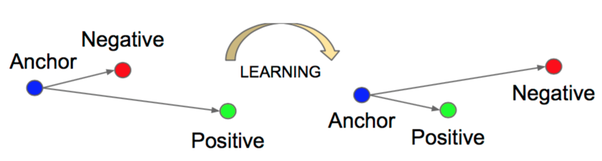

$pos\_dist = \sum(user2vec(U)-user2vec(P))$  - расстояние между вектором user и вектором хорошего фильма   
$neg\_dist = \sum(user2vec(U)-user2vec(N))$ - расстояние между вектором user и вектором плохого фильма   
$basic\_loss = pos\_dist - neg\_dist + alpha$  
$loss = K.maximum(basic\_loss, 0.0)$    

Таким образом минимизируем расстояние между вектором пользователя и вектором хорошего фильма и максимизируем расстояние между вектором пользователя и вектором плохого фильма    

#### для чего мы подаём y_true в triplet_loss, хотя она там даже не используется ???  
В функции triplet_loss параметр y_true на самом деле не используется внутри функции. Он передается в функцию по умолчанию, потому что Keras ожидает, что все функции потерь будут принимать как минимум два аргумента: истинные значения (y_true) и предсказанные значения (y_pred).  

Совместимость с API Keras: В Keras функции потерь должны соответствовать определенному формату, который включает y_true. Это делает их совместимыми с механизмом обучения Keras, даже если сам код функции потерь не использует y_true.   

### Пишем её сами

In [84]:
# y_pred - сконкатенированный вектор состоящий из вектора юзера, вектора хорошего фильма и вектора плохого фильма
# n_dims=128 - длина векторов anchor, positive и negative

def triplet_loss(y_true, y_pred, n_dims=128, alpha=0.4):
    # будем ожидать, что на вход функции прилетит три сконкатенированных 
    # вектора - вектор юзера и два вектора айтема
    anchor = y_pred[:, 0:n_dims] # вектор юзера
    positive = y_pred[:, n_dims:n_dims*2] # вектор хорошего фильма
    negative = y_pred[:, n_dims*2:n_dims*3] # вектор плохого фильма

    # считаем расстояния от вектора юзера до вектора хорошего айтема
    pos_dist = K.sum(K.square(anchor - positive), axis=1)
    # и до плохого
    neg_dist = K.sum(K.square(anchor - negative), axis=1)

    # считаем лосс
    basic_loss = pos_dist - neg_dist + alpha
    loss = K.maximum(basic_loss, 0.0) # возвращаем ноль, если лосс отрицательный
 
    return loss

### 2.2.2 generator  
Используем для того, чтобы сформировать батчи в том формате, в котором модель принимает не вход информацию  

#### Что такое хороший и плохой фильм?  
Мы ставим cut_off = 3 внутри ф-ии generator и это означае, что все фильмы у которых оценка >3 (4,5) считаются хорошими  
фильмы у которых оценка <3 (1,2,3) считаются плохими  

#### !!! Важно, исключены пользователи, у которых все оценки либо "плохие", либо все "хорошие". Так как все юзеры, которые попадают в бакеты должны генерировать как "плохой" фильм, так и "хороший фильм"  

### Функция generator  
Input:  
1) items - таблица фильмов с фичами фильмов (6136 rows × 8814 columns)  
2) users - фичи юзеров с фичами юзеров (44959 rows × 17 columns)  
3) interactions- матрица взаимодействий уже отнормированная  
4) batch_size=1024 - размер батча, который должен быть сгенерирован   

Output:  

Наборы вектором размером (batch_size=1024)  

1) np.array(uid_meta) - вектор фичей юзера: (1024, 16)  
2) np.array(uid_interaction) - вектор взаимодействий юзера с айтемами: (1024, 6136)  
3) np.array(pos) - вектор 'хорошего' айтема: (1024, 8813)  
4) np.array(neg) - вектор 'плохого' айтема: (1024, 8813)  

5) (np.array(uid_meta) - вектор фичей юзера: (1024, 16)  
6) np.array(uid_interaction) - вектор взаимодействий юзера с айтемами: (1024, 6136)  

uid_i - случайный id юзера  
pos_i - случайный фильм с которым uid_i взаимодействовал   
uid_meta - случайный фильм с которым uid_i не взаимодействовал   
uid_meta - фичи юзера   
uid_interaction - вектор фильмов для uid_i, то есть это по сути вектор этого конретного юзера в матрице взаимодействия    
pos - фичи хорошего фильма(pos_i)    
neg - фичи плохого фильма(pos_i)    

In [85]:
# хороший айтем - из датасета взаимодействий  
# плохой айтем - случайный айтем

def generator(items, users, interactions, batch_size=128):
    while True:
        uid_meta = []
        uid_interaction = []
        pos = []
        neg = []
        
        cut_off = 3
        
        # нежелательный список (если все оценки либо)
        excluded_uids = []
        for user in range(len(interactions)):
            Set_raitings = set()
            for rainitg in interactions[user]:
                if rainitg>cut_off:
                    Set_raitings.add(1)
                else:
                    Set_raitings.add(0)
            if len(Set_raitings)==1:
                excluded_uids.append(user)
        
        for _ in range(batch_size):
            # берем рандомный uid
            uid_i = randint(0, interactions.shape[0]-1)
            while uid_i in excluded_uids: # если из нежелательного списка, то снова генерируем uid_i
                uid_i = np.random.randint(0, interactions.shape[0]-1)
                
            # id хорошего айтема (из всех фильмов uid_i находим рандомно один его хороший фильм)
            
            good_items = np.where(interactions[uid_i] > cut_off)[0]
            if good_items.size > 0:
                pos_i = np.random.choice(good_items)
            else:
                print(f"У пользователя {uid_i} нет айтемов с рейтингом > cut_off")    
            
            # id плохого айтема (из всех фильмов uid_i находим рандомно один его плохой фильм)
            
            bad_items = np.where(interactions[uid_i] <= cut_off)[0]
            if bad_items.size > 0:
                neg_i = np.random.choice(good_items)
            else:
                print(f"У пользователя {uid_i} нет айтемов с рейтингом <= cut_off")
            
            # фичи юзера
            uid_meta.append(users.iloc[uid_i])
            # вектор айтемов, с которыми юзер взаимодействовал
            uid_interaction.append(interactions_vec[uid_i])
            # фичи хорошего айтема
            pos.append(items.iloc[pos_i])
            # фичи плохого айтема
            neg.append(items.iloc[neg_i])
            
        yield (np.array(uid_meta), np.array(uid_interaction), np.array(pos), np.array(neg)), (np.array(uid_meta), np.array(uid_interaction))

In [86]:
# инициализируем генератор
gen = generator(items=items_ohe_df.drop(["item_id"], axis=1), 
                users=users_ohe_df.drop(["user_id"], axis=1), 
                interactions=interactions_vec)
ret = next(gen)


print(f"вектор фичей юзера: {ret[0][0].shape}")
print(f"вектор взаимодействий юзера с айтемами: {ret[0][1].shape}")
print(f"вектор 'хорошего' айтема: {ret[0][2].shape}")
print(f"вектор 'плохого' айтема: {ret[0][3].shape}")
print()
print(f"вектор фичей юзера: {ret[1][0].shape}")
print(f"вектор взаимодействий юзера с айтемами: {ret[1][1].shape}")

вектор фичей юзера: (128, 23)
вектор взаимодействий юзера с айтемами: (128, 1283)
вектор 'хорошего' айтема: (128, 63)
вектор 'плохого' айтема: (128, 63)

вектор фичей юзера: (128, 23)
вектор взаимодействий юзера с айтемами: (128, 1283)


### 2.2.3 Архитектура модели

In [87]:
print(items_ohe_df.shape)
items_ohe_df.index.name = None
items_ohe_df.head()

(1283, 64)


,item_id,number of days after the release,unknown,action,adventure,animation,children,comedy,crime,documentary,...,Laurence Fishburne,Meg Ryan,Leslie Nielsen,Wesley Snipes,Alec Baldwin,Daniel Day-Lewis,Audrey Hepburn,Steven Seagal,Harvey Keitel,Woody Harrelson
0,1,0.043308,0,0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.043308,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.043308,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.043308,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.043308,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
column_list_for_DSSM_1 = ['number of days after the release','unknown','action','adventure','animation','children','comedy',
 'crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi','thriller','war',
 'western']

column_list_for_DSSM_2 = column_list_for_DSSM_1 + ['runtime',
       'vote_average', 'vote_count', 'Cary Grant', 'Bruce Willis',
       'Robert De Niro', 'John Travolta', 'Arnold Schwarzenegger',
       'Kevin Costner', 'Harrison Ford', 'Keanu Reeves', 'Jack Nicholson',
       'Sylvester Stallone', 'Robin Williams', 'Jim Carrey',
       'Jean-Claude Van Damme', 'Whoopi Goldberg', 'Nick Nolte', 'Tom Cruise',
       'Charlie Sheen', 'Johnny Depp', 'Meryl Streep', 'Nicolas Cage',
       'Michael Keaton', 'William Shatner', 'Anthony Hopkins', 'Woody Allen',
       'Sean Connery', 'Michael J. Fox', 'Kurt Russell', 'Winona Ryder',
       'Al Pacino', 'Hugh Grant', 'Laurence Fishburne', 'Meg Ryan',
       'Leslie Nielsen', 'Wesley Snipes', 'Alec Baldwin', 'Daniel Day-Lewis',
       'Audrey Hepburn', 'Steven Seagal', 'Harvey Keitel', 'Woody Harrelson']

In [89]:
N_FACTORS = 128

# в датасетах есть столбец user_id/item_id, помним, что он не является фичей для обучения!
ITEM_MODEL_SHAPE_1 = (items_ohe_df[column_list_for_DSSM_1].shape[1], )
ITEM_MODEL_SHAPE_2 = (items_ohe_df[column_list_for_DSSM_2].shape[1], )
USER_META_MODEL_SHAPE = (users_ohe_df.drop(["user_id"], axis=1).shape[1], )

USER_INTERACTION_MODEL_SHAPE = (interactions_vec.shape[1], )

print(f"N_FACTORS: {N_FACTORS}") # размерность вектором user и item, которую хотим получить
print(f"ITEM_MODEL_SHAPE: {ITEM_MODEL_SHAPE_1}") # количество one-hote признаков item (content_type_film,content_type_series,...)
print(f"ITEM_MODEL_SHAPE: {ITEM_MODEL_SHAPE_2}") # количество one-hote признаков item (content_type_film,content_type_series,...)
print(f"USER_META_MODEL_SHAPE: {USER_META_MODEL_SHAPE}") # количество one-hote признаков user (age,income,...)
print(f"USER_INTERACTION_MODEL_SHAPE: {USER_INTERACTION_MODEL_SHAPE}") # количество фильмов в матрице user-item

N_FACTORS: 128
ITEM_MODEL_SHAPE: (20,)
ITEM_MODEL_SHAPE: (63,)
USER_META_MODEL_SHAPE: (23,)
USER_INTERACTION_MODEL_SHAPE: (1283,)


In [90]:
def item_model_1(n_factors=N_FACTORS):
    # входной слой
    inp = keras.layers.Input(shape=ITEM_MODEL_SHAPE_1)
    
    # полносвязный слой
    layer_1 = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                               kernel_regularizer=keras.regularizers.l2(1e-6),
                               activity_regularizer=keras.regularizers.l2(l2=1e-6))(inp)

    # делаем residual connection - складываем два слоя, 
    # чтобы градиенты не затухали во время обучения
    layer_2 = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                             kernel_regularizer=keras.regularizers.l2(1e-6),
                             activity_regularizer=keras.regularizers.l2(l2=1e-6))(layer_1)
    
    add = keras.layers.Add()([layer_1, layer_2])
    
    # выходной слой
    out = keras.layers.Dense(N_FACTORS, activation='linear', use_bias=False,
                             kernel_regularizer=keras.regularizers.l2(1e-6),
                             activity_regularizer=keras.regularizers.l2(l2=1e-6))(add)
    
    return keras.models.Model(inp, out)

def user_model_1(n_factors=N_FACTORS):
    # входной слой для вектора фичей юзера (из users_ohe_df)
    inp_meta = keras.layers.Input(shape=USER_META_MODEL_SHAPE)
    # входной слой для вектора просмотров (из iteractions_vec)
    inp_interaction = keras.layers.Input(shape=USER_INTERACTION_MODEL_SHAPE)

    # полносвязный слой
    layer_1_meta = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(1e-6),
                                 activity_regularizer=keras.regularizers.l2(l2=1e-6))(inp_meta)

    layer_1_interaction = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(1e-6),
                                 activity_regularizer=keras.regularizers.l2(l2=1e-6))(inp_interaction)

    # делаем residual connection - складываем два слоя,
    # чтобы градиенты не затухали во время обучения
    layer_2_meta = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(1e-6),
                                 activity_regularizer=keras.regularizers.l2(l2=1e-6))(layer_1_meta)
    

    add = keras.layers.Add()([layer_1_meta, layer_2_meta])
    
    # конкатенируем вектор фичей с вектором просмотров
    concat_meta_interaction = keras.layers.Concatenate()([add, layer_1_interaction])
    
    # выходной слой
    out = keras.layers.Dense(N_FACTORS, activation='linear', use_bias=False,
                             kernel_regularizer=keras.regularizers.l2(1e-6),
                             activity_regularizer=keras.regularizers.l2(l2=1e-6))(concat_meta_interaction)
    
    return keras.models.Model([inp_meta, inp_interaction], out)

In [91]:
def item_model_2(n_factors=N_FACTORS):
    # входной слой
    inp = keras.layers.Input(shape=ITEM_MODEL_SHAPE_2)
    
    # полносвязный слой
    layer_1 = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                               kernel_regularizer=keras.regularizers.l2(1e-6),
                               activity_regularizer=keras.regularizers.l2(l2=1e-6))(inp)

    # делаем residual connection - складываем два слоя, 
    # чтобы градиенты не затухали во время обучения
    layer_2 = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                             kernel_regularizer=keras.regularizers.l2(1e-6),
                             activity_regularizer=keras.regularizers.l2(l2=1e-6))(layer_1)
    
    add = keras.layers.Add()([layer_1, layer_2])
    
    # выходной слой
    out = keras.layers.Dense(N_FACTORS, activation='linear', use_bias=False,
                             kernel_regularizer=keras.regularizers.l2(1e-6),
                             activity_regularizer=keras.regularizers.l2(l2=1e-6))(add)
    
    return keras.models.Model(inp, out)

def user_model_2(n_factors=N_FACTORS):
    # входной слой для вектора фичей юзера (из users_ohe_df)
    inp_meta = keras.layers.Input(shape=USER_META_MODEL_SHAPE)
    # входной слой для вектора просмотров (из iteractions_vec)
    inp_interaction = keras.layers.Input(shape=USER_INTERACTION_MODEL_SHAPE)

    # полносвязный слой
    layer_1_meta = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(1e-6),
                                 activity_regularizer=keras.regularizers.l2(l2=1e-6))(inp_meta)

    layer_1_interaction = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(1e-6),
                                 activity_regularizer=keras.regularizers.l2(l2=1e-6))(inp_interaction)

    # делаем residual connection - складываем два слоя,
    # чтобы градиенты не затухали во время обучения
    layer_2_meta = keras.layers.Dense(N_FACTORS, activation='elu', use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(1e-6),
                                 activity_regularizer=keras.regularizers.l2(l2=1e-6))(layer_1_meta)
    

    add = keras.layers.Add()([layer_1_meta, layer_2_meta])
    
    # конкатенируем вектор фичей с вектором просмотров
    concat_meta_interaction = keras.layers.Concatenate()([add, layer_1_interaction])
    
    # выходной слой
    out = keras.layers.Dense(N_FACTORS, activation='linear', use_bias=False,
                             kernel_regularizer=keras.regularizers.l2(1e-6),
                             activity_regularizer=keras.regularizers.l2(l2=1e-6))(concat_meta_interaction)
    
    return keras.models.Model([inp_meta, inp_interaction], out)

In [92]:
# инициализируем модели юзера и айтема
i2v_1 = item_model_1()
i2v_2 = item_model_2()

u2v_1 = user_model_1()
u2v_2 = user_model_2()

# вход для вектора фичей юзера (из users_ohe_df)
ancor_meta_in = keras.layers.Input(shape=USER_META_MODEL_SHAPE)
# вход для вектора просмотра юзера (из interactions_vec)
ancor_interaction_in = keras.layers.Input(shape=USER_INTERACTION_MODEL_SHAPE)

# вход для вектора "хорошего" айтема
pos_in_1 = keras.layers.Input(shape=ITEM_MODEL_SHAPE_1)
pos_in_2 = keras.layers.Input(shape=ITEM_MODEL_SHAPE_2)
# вход для вектора "плохого" айтема
neg_in_1 = keras.layers.Input(shape=ITEM_MODEL_SHAPE_1)
neg_in_2 = keras.layers.Input(shape=ITEM_MODEL_SHAPE_2)

# получаем вектор юзера
ancor_1 = u2v_1([ancor_meta_in, ancor_interaction_in])
ancor_2 = u2v_2([ancor_meta_in, ancor_interaction_in])

# получаем вектор "хорошего" айтема
pos_1 = i2v_1(pos_in_1)
pos_2 = i2v_2(pos_in_2)
# получаем вектор "плохого" айтема
neg_1 = i2v_1(neg_in_1)
neg_2 = i2v_2(neg_in_2)

# конкатенируем полученные векторы
res_1 = keras.layers.Concatenate(name="concat_ancor_pos_neg")([ancor_1, pos_1, neg_1])
res_2 = keras.layers.Concatenate(name="concat_ancor_pos_neg")([ancor_2, pos_2, neg_2])

# собираем модели
model_DSSM_1 = keras.models.Model([ancor_meta_in, ancor_interaction_in, pos_in_1, neg_in_1], res_1)
model_DSSM_2 = keras.models.Model([ancor_meta_in, ancor_interaction_in, pos_in_2, neg_in_2], res_2)

#### Общая схема:   

#### 1) Получение 3-х векторов  

А) Вектор хорошего фильа  
Б) Вектор плохого фильма  
В) вектор Пользователя   

на вход в эти 2 модели (item_model и user_model) подаём наши вектора известные в цифрах и получаем 3 вектора таких:  
item_vector_good = item_model(good item)  (128) good item - вектор "хорошего" item из матрицы про item   
item_vector_bad = item_model(bad item)  (128)  good item - вектор "плохого" item из матрицы про item  
user_vector = item_model(user features, user_ineraction_vec)  (128) - вектора user из матрицы про пользователя и user из матрицы взаимодействия     

#### 2) Получение Большого вектора  
конкатинируем их и получаем БОЛЬШОЙ вектор res (384 = 3*128)  
res = concat()  

то есть res это вектор который получился когда на вход подали известные данные и потом эти данные перемножались через веса проходя через слои и вывели нам вектор итоговый 384  

где первые 128 означают вектор item_vector_good, вторые 128 значений item_vector_bad и последние user_vector  

#### 3) Подсчёт loss  

Далее этот res подаётся в loss (у нас triplet_loss) и считается это одно значение loss  

То есть тут уменьшается не как в классическом ML |y_pred - y_true|, а здесь считается такое "хитрая" ф-я, чтобы user_vec был как можно ближе к item_good_vec и как можно дальше item_bad_vec  

#### 4) Рассчёт весов  
После того как посчитался loss мы идём по backpropagation и изменяем веса   

#### 5) Пробегаем все эпохи  
steps_per_epoch=100 - именно столько батчей я пробегаю чтобы завершить одну эпоху (гиперпараметр)  

#### 6) Получаем модели  

В конечном итоге мы получаем натренированные модели u2v и i2v  
Подаём данные конкретного user в модель u2v и данные конкретного item в i2v. После чего мы можем посчитать расстояние между user_vec и item_vec. 
Самые близкие item это и будут самые рекомендованные фильмы   

In [93]:
model_name = 'recsys_resnet_linear'

# 1 логируем процесс обучения в тензорборд:

# можно будет загрузить информацию об обучении модели из указанной папки файл и будут показано
# как обучалась эта модель и какая была ошибка по эпохам
t_board = keras.callbacks.TensorBoard(log_dir=f'runs/{model_name}') 

# 2 уменьшаем learning_rate, если лосс долго не уменьшается (в течение двух эпох)

# мониторим 'loss'
# patience - если loss не уменьшается в течении 2-х эпох, то learning_rate будет снижен
# Factor=0.8 - значение learning rate будет уменьшено на 20% (умножено на 0.8).
# Verbose=1 включает вывод информации, чтобы вы могли видеть, когда learning rate изменяется.

decay = keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, factor=0.8, verbose=1)

# 3 сохраняем модель после каждой эпохи, если лосс уменьшился

# Monitor="loss" указывает, что сохранение модели происходит, ориентируясь на значение функции потерь. 
# То есть если значение loss улучшится, ModelCheckpoint сохранит текущую версию модели.

check = keras.callbacks.ModelCheckpoint(filepath=model_name + '/epoch{epoch}-{loss:.2f}.keras', monitor="loss")

In [94]:
# компилируем модель, используем оптимайзер Adam и triplet loss
opt_1 = keras.optimizers.Adam(learning_rate=0.001)
opt_2 = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.Adam(lr=0.001)
model_DSSM_1.compile(loss=triplet_loss, optimizer=opt_1)
model_DSSM_2.compile(loss=triplet_loss, optimizer=opt_2)

Посмотрим, что получилось:

In [95]:
# модель айтема
item_model_1().summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 20)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 128)               │           2,560 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 128)               │          16,384 │ dense_14[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_4 (Add)                   │ (None, 128)               │               0 │ dense_14[0][0],            │
│                               │                           │                 │ dense_15[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 128)               │          16,384 │ add_4[0][0]                │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 35,328 (138.00 KB)

 Trainable params: 35,328 (138.00 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# модель юзера
user_model_1().summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 23)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 128)               │           2,944 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_19 (Dense)              │ (None, 128)               │          16,384 │ dense_17[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_14 (InputLayer)   │ (None, 1283)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_5 (Add)                   │ (None, 128)               │               0 │ dense_17[0][0],            │
│                               │                           │                 │ dense_19[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 128)               │         164,224 │ input_layer_14[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 256)               │               0 │ add_5[0][0],               │
│                               │                           │                 │ dense_18[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_20 (Dense)              │ (None, 128)               │          32,768 │ concatenate_2[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 216,320 (845.00 KB)

 Trainable params: 216,320 (845.00 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# общая модель 1
model_DSSM_1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 23)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_7 (InputLayer)    │ (None, 1283)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_8 (InputLayer)    │ (None, 20)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_10 (InputLayer)   │ (None, 20)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_2 (Functional)     │ (None, 128)               │         216,320 │ input_layer_6[0][0],       │
│                               │                           │                 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional (Functional)       │ (None, 128)               │          35,328 │ input_layer_8[0][0],       │
│                               │                           │                 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_ancor_pos_neg          │ (None, 384)               │               0 │ functional_2[0][0],        │
│ (Concatenate)                 │                           │                 │ functional[0][0],          │
│                               │                           │                 │ functional[1][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 251,648 (983.00 KB)

 Trainable params: 251,648 (983.00 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
# общая модель 2
model_DSSM_2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 23)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_7 (InputLayer)    │ (None, 1283)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_9 (InputLayer)    │ (None, 63)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_11 (InputLayer)   │ (None, 63)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_3 (Functional)     │ (None, 128)               │         216,320 │ input_layer_6[0][0],       │
│                               │                           │                 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_1 (Functional)     │ (None, 128)               │          40,832 │ input_layer_9[0][0],       │
│                               │                           │                 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concat_ancor_pos_neg          │ (None, 384)               │               0 │ functional_3[0][0],        │
│ (Concatenate)                 │                           │                 │ functional_1[0][0],        │
│                               │                           │                 │ functional_1[1][0]         │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 257,152 (1004.50 KB)

 Trainable params: 257,152 (1004.50 KB)

 Non-trainable params: 0 (0.00 B)

### 2.2.4 Построение модели

In [99]:
# начинаем обучение, не забывая дропнуть столбцы item_id и user_id 
# из датафреймов при инициализации генератора.

# batch_size можно (и лучше) поставить побольше, если не органичены в ресурсах

model_DSSM_1.fit(generator(items=items_ohe_df[column_list_for_DSSM_1], # передаем таблицу с информацией об items без item_id
                    users=users_ohe_df.drop(["user_id"], axis=1), # передаем таблицу с информацией о users без user_id
                    interactions=interactions_vec,
                    batch_size=64), 
          steps_per_epoch=100, 
          epochs=30, 
          initial_epoch=0,  
          callbacks=[decay, t_board, check]
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 301ms/step - loss: 3.3781 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 304ms/step - loss: 0.9931 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - loss: 0.6909 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - loss: 0.6221 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 283ms/step - loss: 0.5575 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - loss: 0.5472 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - loss: 0.5166 - learning_rate: 0.0010
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - loss: 0.5016 - learning_rate: 0.0010
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - loss: 0.4858 - learning_rate: 0.0010
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - loss: 0.4818 - learning_rate: 0.0010
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - l

In [100]:
# начинаем обучение, не забывая дропнуть столбцы item_id и user_id 
# из датафреймов при инициализации генератора.

# batch_size можно (и лучше) поставить побольше, если не органичены в ресурсах

model_DSSM_2.fit(generator(items=items_ohe_df[column_list_for_DSSM_2], # передаем таблицу с информацией об items без item_id
                    users=users_ohe_df.drop(["user_id"], axis=1), # передаем таблицу с информацией о users без user_id
                    interactions=interactions_vec,
                    batch_size=64), 
          steps_per_epoch=100, 
          epochs=30, 
          initial_epoch=0,  
          callbacks=[decay, t_board, check]
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 283ms/step - loss: 3.8750 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - loss: 1.2196 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 301ms/step - loss: 0.9531 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - loss: 0.7710 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 285ms/step - loss: 0.6788 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - loss: 0.6355 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - loss: 0.6089 - learning_rate: 0.0010
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 275ms/step - loss: 0.5672 - learning_rate: 0.0010
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - loss: 0.5564 - learning_rate: 0.0010
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - loss: 0.5514 - learning_rate: 0.0010
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - l

#### Рассчитаем все user_vec и item_vec  
далее зная uid и iid пётем перемножения векторов можно будет узнать score item для конкретного user  

In [101]:
user_vec_list_1 = []
user_vec_list_2 = []

users_ohe_df_index_list = list(users_ohe_df.index)

for i in users_ohe_df_index_list:
    
    # получаем фичи юзера и вектор его просмотров айтемов
    user_meta_feats = users_ohe_df.drop(["user_id"], axis=1).iloc[i]
    user_interaction_vec = interactions_vec[i]
    
    # получаем вектор юзера
    user_vec_1 = u2v_1.predict([np.array(user_meta_feats).reshape(1, -1), np.array(user_interaction_vec).reshape(1, -1)])
    user_vec_list_1.append(user_vec_1)
    
    user_vec_2 = u2v_2.predict([np.array(user_meta_feats).reshape(1, -1), np.array(user_interaction_vec).reshape(1, -1)])
    user_vec_list_2.append(user_vec_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [102]:
item_vec_list_1 = []
item_vec_list_2 = []

for i in items_ohe_df.index:
    # получаем фичи айтема
    item_feats_1 = items_ohe_df[column_list_for_DSSM_1].iloc[i]
    item_feats_2 = items_ohe_df[column_list_for_DSSM_2].iloc[i]
    
    # и вектор айтема
    item_vec_1 = i2v_1.predict(np.array(item_feats_1).reshape(1, -1))
    item_vec_list_1.append(item_vec_1)
    
    item_vec_2 = i2v_2.predict(np.array(item_feats_2).reshape(1, -1))
    item_vec_list_2.append(item_vec_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

#### Считаем показатель prediction DSSM для всевозможных комбинации user_id и item_id

In [103]:
pred_column_DSSM_ALL_1 = []
pred_column_DSSM_ALL_2 = []

for uid in range(num_users):
    for iid in range(num_items):
    
        user_vec_1 = user_vec_list_1[uid]
        item_vec_1 = item_vec_list_1[iid]
        
        user_vec_2 = user_vec_list_2[uid]
        item_vec_2 = item_vec_list_2[iid]

        EqDist_1 = ED(user_vec_1, item_vec_1)
        EqDist_2 = ED(user_vec_2, item_vec_2)
        
        pred_column_DSSM_ALL_1.append([uid_to_user_id[uid],iid_to_item_id[iid], EqDist_1[0][0]])
        pred_column_DSSM_ALL_2.append(EqDist_2[0][0])
        
recommendations_df_DSSM_ALL = pd.DataFrame(pred_column_DSSM_ALL_1,columns = ['user_id','item_id','pred DSSM_1'])

recommendations_df_DSSM_ALL['pred DSSM_2'] = pred_column_DSSM_ALL_2

print(recommendations_df_DSSM_ALL.shape)
recommendations_df_DSSM_ALL.head()

(1209869, 4)


,user_id,item_id,pred DSSM_1,pred DSSM_2
0,1,1,2.205101,2.741158
1,1,2,2.204971,2.659785
2,1,3,2.163296,2.773100
3,1,4,2.177916,2.708715
4,1,5,2.132509,2.727863


In [104]:
# Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
recommendations_df_DSSM_ALL = recommendations_df_DSSM_ALL.sort_values(
    by=['user_id', 'pred DSSM_1'], ascending=[True, False]
)

# Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
recommendations_df_DSSM_ALL['rank DSSM_1'] = recommendations_df_DSSM_ALL.groupby('user_id')['pred DSSM_1'].rank(
    method='first', ascending=False
).astype(int)

# Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
recommendations_df_DSSM_ALL = recommendations_df_DSSM_ALL.sort_values(
    by=['user_id', 'pred DSSM_2'], ascending=[True, False]
)

# Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
recommendations_df_DSSM_ALL['rank DSSM_2'] = recommendations_df_DSSM_ALL.groupby('user_id')['pred DSSM_2'].rank(
    method='first', ascending=False
).astype(int)

In [105]:
recommendations_df_DSSM_ALL.head()

,user_id,item_id,pred DSSM_1,pred DSSM_2,rank DSSM_1,rank DSSM_2
1155,1,1240,2.136941,2.888207,698,1
1089,1,1159,2.082508,2.861598,1171,2
6,1,7,2.173210,2.850909,244,3
1217,1,1386,2.144978,2.850631,663,4
253,1,260,2.113549,2.850071,990,5


#### Добавляем rank DSSM в таблицу 

In [106]:
Big_rank_Table = pd.merge(Big_rank_Table, recommendations_df_DSSM_ALL[['user_id', 'item_id','rank DSSM_1','rank DSSM_2']], on=['user_id', 'item_id'], how='outer')
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 13)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2
0,1,15,1,1099,729,1144,614,32,506,72,66,432,312
1,1,50,2,1077,707,1122,29,1,2,4,4,676,1213
2,1,269,3,981,611,1026,147,19,914,17,17,790,706
3,1,127,4,1045,675,1090,10,11,5,3,3,670,1214
4,1,9,5,1102,732,1147,273,26,476,34,28,438,382


#### Под конец добавим столбец 'Sample', чтобы понимать какая это выборка Train, Test или взаимодейтсвий не было

In [107]:
Big_rank_Table = pd.merge(Big_rank_Table, Big_Table[['user_id','item_id','Sample','rating']], on=['user_id', 'item_id'], how='outer')
print(Big_rank_Table.shape)
Big_rank_Table.head()

(1209869, 15)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,15,1,1099,729,1144,614,32,506,72,66,432,312,Train,5.0
1,1,50,2,1077,707,1122,29,1,2,4,4,676,1213,Train,5.0
2,1,269,3,981,611,1026,147,19,914,17,17,790,706,Train,5.0
3,1,127,4,1045,675,1090,10,11,5,3,3,670,1214,Train,5.0
4,1,9,5,1102,732,1147,273,26,476,34,28,438,382,Train,5.0


In [108]:
#Big_rank_Table.to_csv('Big_rank_Table.csv',index=False)

### Ура !!! Получили результаты для метрик

In [109]:
del Big_Table

### 3 Метрики качества

### 3.1 Очистка выборки Test

1) Мы уже избавились от тех item_id, которые не встречалсь в выборе train  
2) Количество оценок >=10
Возьмем только те рейтинги у кого есть хотя бы 10 оценок, иначе сложно оценить топ 5, так как пользователь мог поставить всего 5 оценок и все по баллу "1" и получается что мы порекомендовали только плохие фильмы. Получили на 433 оценки меньше

#### Создаеём выборку рангов на тестовой выборке (на которой не обучали модели LGBM и DSSM)

In [110]:
rank_Test = Big_rank_Table[Big_rank_Table['Sample']=='Test'].reset_index(drop=True)

In [111]:
print(rank_Test.shape)
rank_Test.head()

(19715, 15)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,98,55,3,3,4,48,20,34,186,168,277,896,Test,4.0
1,1,180,75,30,25,27,110,99,58,140,140,184,905,Test,3.0
2,1,24,77,97,114,123,384,166,1274,441,406,923,1179,Test,3.0
3,1,188,85,37,74,45,163,199,139,234,214,140,1193,Test,3.0
4,1,118,86,83,58,74,980,37,928,871,928,101,1210,Test,3.0


#### Подсчёт количества оценок для каждого пользователя по рейтингу

In [112]:
# aggfunc='size' — считаем количество значений.
# fill_value=0 — заполняем пропущенные значения нулями, если для какого-то рейтинга не было оценок.

rating_counts = data_Test.pivot_table(index='user_id', columns='rating', aggfunc='size', fill_value=0)

# Сбрасываем заголовок над столбцами 'rating'
# rating присваивается в качестве имени для группы столбцов (то, что называется "MultiIndex").
# По умолчанию, это имя столбцов сохраняется как атрибут columns.name
rating_counts.columns.name = None

# Добавляем столбец с общим количеством оценок 'All'
rating_counts['All'] = rating_counts.sum(axis=1)

# Выводим результат
rating_counts = rating_counts.reset_index()
rating_counts

,user_id,1,2,3,4,5,All
0,1,14,12,32,44,35,137
1,2,2,0,8,8,4,22
2,3,5,7,9,4,1,26
3,4,0,0,2,3,5,10
4,5,21,11,27,15,10,84
...,...,...,...,...,...,...,...
454,457,0,0,1,6,1,8
455,458,0,0,0,3,0,3
456,459,0,0,1,0,0,1
457,460,0,0,1,0,0,1


#### Оставляем только те user_id, у которых rating_counts['All']>=10

In [113]:
user_id_for_metric = list(rating_counts[rating_counts['All']>=10]['user_id'])

data_Test_for_metrics = rank_Test[rank_Test['user_id'].isin(user_id_for_metric)].reset_index(drop=True)

print(rank_Test.shape)
print(data_Test_for_metrics.shape)
data_Test_for_metrics.head()

(19715, 15)
(19288, 15)


,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,98,55,3,3,4,48,20,34,186,168,277,896,Test,4.0
1,1,180,75,30,25,27,110,99,58,140,140,184,905,Test,3.0
2,1,24,77,97,114,123,384,166,1274,441,406,923,1179,Test,3.0
3,1,188,85,37,74,45,163,199,139,234,214,140,1193,Test,3.0
4,1,118,86,83,58,74,980,37,928,871,928,101,1210,Test,3.0


### 3.2 Рассчёт метрик

#### 3.2.1 Распределение оценок для различных моделей

In [114]:
# ф-я, на вход принимает таблицу результатов и условия фильтрации и на выходе выдаёт распределение баллов:
# (количество "1" количество "2" и т д до "5")

def distribution_of_raitings(data, # таблица с результатами
                             Name_model, # название модели
                             filtered_columns, # колонки по которым будем мерить результаты оценок
                             top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
                             rank_column, # колонка по которой и будем фильтровать топ айтемов
                             top_N # количество топ продуктов, которые оставляем для рекомендации
                            ):
    
    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
    
    # берем только top_N строк для каждого user_id
    if rank_column != '-':
        data_copy = data_copy.groupby("user_id", group_keys=False).apply(lambda x: x.nsmallest(top_N, rank_column))
    
    # получаем распределение в виде Series (столбец)
    rating_counts = data_copy['rating'].value_counts(normalize=True).sort_index() * 100
    
    # преобразуем в dataframe (в строку)
    rating_percentages = rating_counts.to_frame().T

    # Форматирование значений с точностью до 2 знаков после запятой
    rating_percentages = rating_percentages.round(2)

    # Убираем название первой колонки
    rating_percentages.columns.name = None

    # Устанавливаем индекс как 'Start_Sample'
    rating_percentages.index = [Name_model]

    # Преобразуем индекс в обычный столбец
    rating_percentages_reset = rating_percentages.reset_index()

    # Переименовываем столбец 'index' в 'Sample'
    rating_percentages_reset = rating_percentages_reset.rename(columns={'index': 'Sample'})
    
    rating_percentages_reset.columns = ['Sample','1','2','3','4','5']
    
    return rating_percentages_reset

In [115]:
data = data_Test_for_metrics.copy()
Name_model = 'SVD + LGBM_1'
filtered_columns = ['rank SVD']
top_N_for_filter = 100
rank_column = 'rank LGBMRanker_1'
top_N = 10

distribution_of_raitings(data, # таблица с результатами
                             Name_model, # название модели
                             filtered_columns, # колонки по которым будем мерить результаты оценок
                             top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
                             rank_column,
                             top_N # количество топ продуктов, которые оставляем для рекомендации
                              )

,Sample,1,2,3,4,5
0,SVD + LGBM_1,2.52,7.14,19.99,37.75,32.6


In [116]:
data = data_Test_for_metrics.copy()
top_N_for_filter = 100
top_N = 10

distribution_df_raitings_df = pd.concat([
    
    distribution_of_raitings(data,'Start_Sample',[],top_N_for_filter,'-',top_N),
    
    # only first stage filtering
    pd.DataFrame([["only 1 stage filtering", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD',['rank SVD'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'KNN_Cos',['rank KNN_cos'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'KNN_BM25',['rank KNN_BM25'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'KNN_TFIDF',['rank KNN_TFIDF'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'ALS',['rank ALS'],top_N_for_filter,'-',top_N),
    distribution_of_raitings(data,'LightFM',['rank LightFM'],top_N_for_filter,'-',top_N),
    
    # + second stage: LGBMRanker_1
    pd.DataFrame([["+ 2 stage: initial data", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD + LGBMRanker_1',['rank SVD'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'KNN_Cos + LGBMRanker_1',['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'KNN_BM25 + LGBMRanker_1',['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'KNN_TFIDF + LGBMRanker_1',['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'ALS + LGBMRanker_1',['rank ALS'],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'LightFM + LGBMRanker_1',['rank LightFM'],top_N_for_filter,'rank LGBMRanker_1',top_N), 
    
    # + second stage: LGBMRanker_2
    pd.DataFrame([["+ 2 stage: & 1 stage prediction data", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD + LGBMRanker_2',['rank SVD'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'KNN_Cos + LGBMRanker_2',['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'KNN_BM25 + LGBMRanker_2',['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'KNN_TFIDF + LGBMRanker_2',['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'ALS + LGBMRanker_2',['rank ALS'],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'LightFM + LGBMRanker_2',['rank LightFM'],top_N_for_filter,'rank LGBMRanker_2',top_N), 
    
    # + third stage: LGBMRanker_3
    pd.DataFrame([["+ 2 stage: & additional movie data", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'SVD + LGBMRanker_3',['rank SVD'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'KNN_Cos + LGBMRanker_3',['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'KNN_BM25 + LGBMRanker_3',['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'KNN_TFIDF + LGBMRanker_3',['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'ALS + LGBMRanker_3',['rank ALS'],top_N_for_filter,'rank LGBMRanker_3',top_N),
    distribution_of_raitings(data,'LightFM + LGBMRanker_3',['rank LightFM'],top_N_for_filter,'rank LGBMRanker_3',top_N), 
    
    # LGBMRanker
    pd.DataFrame([["only 2 stage", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'LGBMRanker_1',[],top_N_for_filter,'rank LGBMRanker_1',top_N),
    distribution_of_raitings(data,'LGBMRanker_2',[],top_N_for_filter,'rank LGBMRanker_2',top_N),
    distribution_of_raitings(data,'LGBMRanker_3',[],top_N_for_filter,'rank LGBMRanker_3',top_N),
    
    # DSSM
    pd.DataFrame([["DSSM model", 0, 0, 0, 0, 0]],columns=['Sample','1','2','3','4','5']),
    distribution_of_raitings(data,'DSSM initial data',[],top_N_for_filter,'rank DSSM_1',top_N),
    distribution_of_raitings(data,'DSSM_additional data',[],top_N_for_filter,'rank DSSM_2',top_N),
]
,axis = 0
).reset_index(drop=True)

In [117]:
from functools import partial

In [118]:
# Для отрисовки таблиц с синей полоской
Class_model_list = ['only 1 stage filtering',
                    '+ 2 stage: initial data',
                    '+ 2 stage: & 1 stage prediction data',
                    '+ 2 stage: & additional movie data',
                    'only 2 stage',
                    'DSSM model']

def highlight_row(row, df):
    if row["Sample"] in Class_model_list:
        return [
            "background-color: skyblue; text-align: center; font-weight: bold"
            if col == "Sample"
            else "background-color: skyblue;"
            for col in df.columns  # Используем переданный DataFrame
        ]
    return [""] * len(row)

In [119]:
# Передаём DataFrame через functools.partial
highlight_partial = partial(highlight_row, df=distribution_df_raitings_df)

# Копируем DataFrame
distribution_df_raitings_df_for_presentation = distribution_df_raitings_df.copy()

# Определяем числовые столбцы
numeric_columns = distribution_df_raitings_df_for_presentation.select_dtypes(include=["float", "int"]).columns

# Применяем стили
distribution_df_raitings_df_for_presentation = (
    distribution_df_raitings_df_for_presentation.style
    .apply(highlight_partial, axis=1)  # Используем highlight_partial
    .format("{:.2f}", subset=numeric_columns)  # Применяем форматирование
)

distribution_df_raitings_df_for_presentation

,Sample,1,2,3,4,5
0,Start_Sample,6.57,10.93,26.05,33.95,22.50
1,only 1 stage filtering,0.00,0.00,0.00,0.00,0.00
2,SVD,3.24,7.76,22.36,36.96,29.69
3,KNN_Cos,3.25,7.46,23.20,37.13,28.95
4,KNN_BM25,3.51,7.70,22.55,37.20,29.04
5,KNN_TFIDF,3.53,7.98,23.45,36.67,28.37
6,ALS,0.76,2.48,11.93,36.64,48.19
7,LightFM,3.07,7.77,20.95,37.00,31.21
8,+ 2 stage: initial data,0.00,0.00,0.00,0.00,0.00
9,SVD + LGBMRanker_1,2.52,7.14,19.99,37.75,32.60


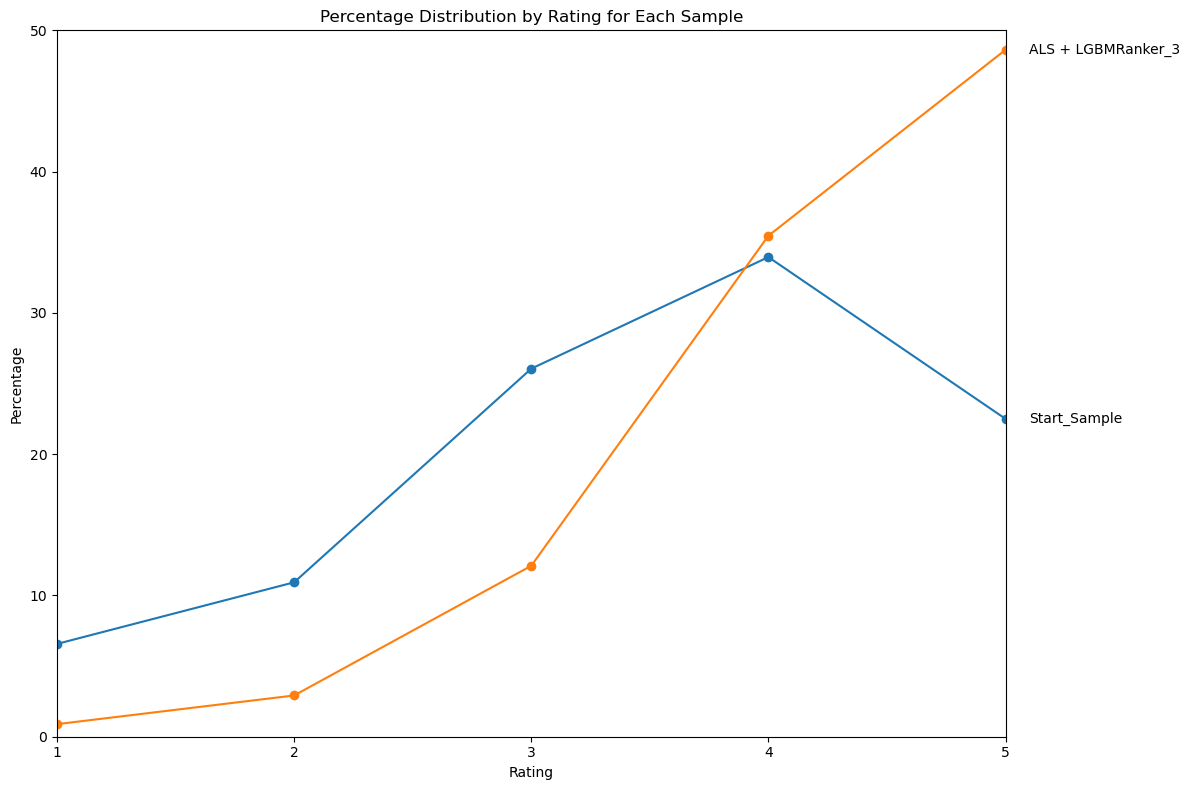

In [120]:
df = distribution_df_raitings_df[
    distribution_df_raitings_df['Sample'].isin(['Start_Sample', 'ALS + LGBMRanker_3', 'DSSM_2'])
].copy()
# Создаем график
fig, ax = plt.subplots(figsize=(12, 8))

# Устанавливаем диапазон для осей
ax.set_xlim(1, 5)
ax.set_ylim(0, 50)

# Добавляем линии для каждого образца и подписываем их справа
for i, row in df.iterrows():
    ax.plot(range(1, 6), row[1:], marker='o', label=row["Sample"])
    ax.text(5.1, row[5], row["Sample"], va='center')  # Добавляем подпись справа от последней точки

# Настройка осей и подписи
ax.set_xlabel("Rating")
ax.set_ylabel("Percentage")
ax.set_title("Percentage Distribution by Rating for Each Sample")

# Метки для оси X
ax.set_xticks([1, 2, 3, 4, 5])

# Легенду можно скрыть, если подписи справа достаточно
plt.legend().set_visible(False)

# Отображаем график
plt.tight_layout()
plt.show()

#### 3.2.2 Precision at K (Precision@K)

**P𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛@K** - доля позитивных элементов в первых k позициях

**positive_cutoff:** Сначала обозначаем наш positive_cutoff, например, positive_cutoff = 4 (всё что 4 или 5 это positive)  

**k:** Выбираю окно в котором буду считать долю позитивных вариантов  

$Precision@K = \frac{1}{k}\sum\limits_{i=1}^{k} Relevance@i$  

#### Алгоритм рассчёта:  
1) Для каждого user_id выделяю топ k наивысших балла (пусть k = 5)  
2) Для каждого user_id считаю долю items >= positive_cutoff (то есть долю фильмов с рейтингом 4,5, если таких фильмов 3, то доля для конкретного user_id будет 0.6 (3 из 5), но мы ее умножаем на 100 переводя в %  
3) Беру средний показатель доли по всем user_id  

In [121]:
def Precision(data, # таблица с результатами
              Name_model, # прописываю название модели
              filtered_columns, # колонки по которым будем мерить результаты оценок
              top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
              rank_column, # колонка результатов по которой провожу замер Precision
              top_N, # окно - top_N айтемов
              positive_cutoff # уровень по которому определяю хороший/плохой айтем
             ):

    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <=top_N_for_filter).all(axis=1)]
    
    # сортирую данные, чтобы 'user_id' был по порядку, 
    top_movie_id_by_rank = data_copy.sort_values(['user_id', rank_column], ascending=[True, True])

    # оставляю только top_N минимальных по rank
    top_movie_id_by_rank = top_movie_id_by_rank.groupby('user_id').head(top_N).reset_index(drop=True)
    
    
    top_movie_id_by_rank = top_movie_id_by_rank[top_movie_id_by_rank['rating']>=positive_cutoff].groupby('user_id').count().reset_index()[['user_id',rank_column]]
    top_movie_id_by_rank.columns = ['user_id','positive']
    top_movie_id_by_rank['Precision@K'] = top_movie_id_by_rank['positive']/top_N

    Hit_rate = (100*sum(top_movie_id_by_rank['positive'])/(top_N*top_movie_id_by_rank.shape[0]))
    
    return pd.DataFrame([[Name_model,round(Hit_rate, 2)]], columns = ['Sample','Precision'])

In [122]:
data = data_Test_for_metrics.copy()
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4

Precision_K_Table = pd.concat([
    
# only first stage filtering
Precision(data, 'SVD', [], top_N_for_filter, 'rank SVD', top_N, positive_cutoff),
Precision(data, 'KNN_Cos', [], top_N_for_filter, 'rank KNN_cos', top_N, positive_cutoff),
Precision(data, 'KNN_BM25', [], top_N_for_filter, 'rank KNN_BM25', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF', [], top_N_for_filter, 'rank KNN_TFIDF', top_N, positive_cutoff),
Precision(data, 'ALS', [], top_N_for_filter, 'rank ALS', top_N, positive_cutoff),
Precision(data, 'LightFM', [], top_N_for_filter, 'rank LightFM', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_1
Precision(data, 'SVD + LGBMRanker_1', ['rank SVD'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'ALS + LGBMRanker_1', ['rank ALS'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'LightFM + LGBMRanker_1', ['rank LightFM'],top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_2
Precision(data, 'SVD + LGBMRanker_2', ['rank SVD'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'ALS + LGBMRanker_2', ['rank ALS'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'LightFM + LGBMRanker_2', ['rank LightFM'],top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),

# + second stage: LGBMRanker_3
Precision(data, 'SVD + LGBMRanker_3', ['rank SVD'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'ALS + LGBMRanker_3', ['rank ALS'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
Precision(data, 'LightFM + LGBMRanker_3', ['rank LightFM'],top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
    
# LGBMRanker
Precision(data, 'LGBMRanker_1', [], top_N_for_filter, 'rank LGBMRanker_1', top_N, positive_cutoff),
Precision(data, 'LGBMRanker_2', [], top_N_for_filter, 'rank LGBMRanker_2', top_N, positive_cutoff),
Precision(data, 'LGBMRanker_3', [], top_N_for_filter, 'rank LGBMRanker_3', top_N, positive_cutoff),
    
# DSSM
Precision(data, 'DSSM initial data', [], top_N_for_filter, 'rank DSSM_1', top_N, positive_cutoff),
Precision(data, 'DSSM_additional data', [], top_N_for_filter, 'rank DSSM_2', top_N, positive_cutoff),

]
,axis = 0
).reset_index(drop=True)

In [123]:
Precision_K_Table

,Sample,Precision
0,SVD,67.56
1,KNN_Cos,70.41
2,KNN_BM25,70.23
3,KNN_TFIDF,69.64
4,ALS,77.13
5,LightFM,66.19
6,SVD + LGBMRanker_1,56.28
7,KNN_Cos + LGBMRanker_1,69.22
8,KNN_BM25 + LGBMRanker_1,69.71
9,KNN_TFIDF + LGBMRanker_1,69.69


#### 3.2.3 MAP

Здесь Precision@K не просто среднее, а наростяющим итогом от 1 до 10, учитывая позицию

**MAP (Mean Average Precision)**  

$MAP = \frac{1}{N}\sum\limits_{i=1}^{N} AP_{i}$    

**Average Precision (AP) AP@K**   

AP@K - среди K(например, 5) позиций считается Precision@K и считается для каждого K (1,2,3,4,5)  
После чего суммируем эти Precision@K и делим на количество положительных элементов, то есть сколько айтемов было >=positive_cuttof  

**Плюс** - учитывается позиция положительного айтема  

N — общее количество релевантных элементов для конкретного пользователя.  
Точность(k) — это точность, рассчитанная в каждой позиции.  
rel(k) равен 1, если элемент на позиции k является релевантным, и 0 в противном случае.  

$AP = \frac{1}{n_{relevant}}\sum\limits_{i=1}^{K} P@k*rel(k)$  

$P@k$ — точность на уровне k (число релевантных документов среди первых k элементов)  
$rel(k)$ — индикатор того, является ли документ на позиции k релевантным (0 или 1)  
$𝑛_{relevant}$ — общее количество релевантных документов для данного запроса (или пользователя)  

**Пример:**  
Для одного user_id  
1) Отсортировали Топ 5 'rank_SVD'  
2) Получили:  
rating = [3,5,5,4,5]    
positive = [0,1,1,1,1]  
Precision@K = [0,0.5,0.66,0.75,0.8]  
3) positive*Precision@K = 0 *0 + 1 *0.5 + 1 *0.66 + 1 *0.75 + 1 *0.8 = 2.716667  
4) positive*Precision@K/$𝑛_{relevant}$ = 2.716667/sum([0,1,1,1,1]) = 2.716667/4 = 0.67  

In [124]:
def Average_Precision_AP_per_user(data, 
                         user_id_column,
                         rating_column,
                         rank_column,
                         user_id,
                         top_N, 
                         positive_cutoff):
    
    data = data[data[user_id_column]==user_id].sort_values([user_id_column, rank_column], ascending=[True, True]).head(top_N).reset_index(drop=True)

    if data.shape[0]<top_N:
        result = -1
    
    else:
        data['positive'] = (data[rating_column] >= positive_cutoff).astype(int)

        data['Precision@K'] = (data['positive']*data['positive'].cumsum())/list(range(1,top_N+1))


        if sum(data['positive'])==0:
            result = 0
        else:
            result = sum(data['Precision@K'])/sum(data['positive'])
    return result

def Average_Precision_AP(data, 
                         Name_model, # прописываю название модели
                         filtered_columns, # колонки по которым будем мерить результаты оценок
                         top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
                         user_id_column, # колонка где лежат user_id
                         rating_column, # колонка с настящим рейтингов
                         rank_column, # колонка по предсказанию
                         top_N, # топ N айтемов
                         positive_cutoff # граница по которой выделяем хороший/плохой айтем
                        ):
    
    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
    
    result_table = []
    result = []
    user_id_List = sorted(set(data_copy[user_id_column]))
    
    count_users_less_than_top_N = 0
    
    for i in user_id_List:
        #print(i)
        Average_Precision_AP_per_user_val = Average_Precision_AP_per_user(data_copy, 
                         user_id_column,
                         rating_column,
                         rank_column,
                         i,
                         top_N, 
                         positive_cutoff)
        
        if Average_Precision_AP_per_user_val == -1:
            count_users_less_than_top_N+=1
            # print('there is', user_id_column ,'< top_N')
            #return
        else:
            result.append(Average_Precision_AP_per_user_val)
        # result_table.append([i,Average_Precision_AP_per_user_val])
    
    # pd.DataFrame(result_table,columns=[user_id_column,'Average_Precision'])
    
    
    print(Name_model+ " ", count_users_less_than_top_N)
    MAP = np.mean(np.array(result))
    return pd.DataFrame([[Name_model,round(MAP, 2)]], columns = ['Sample','MAP'])

In [125]:
data = data_Test_for_metrics.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4

MAP_Table = pd.concat([
    
# only first stage filtering
Average_Precision_AP(data, 'SVD', [],top_N_for_filter, user_id_column, rating_column, 'rank SVD', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos', [],top_N_for_filter, user_id_column, rating_column, 'rank KNN_cos', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25', [],top_N_for_filter, user_id_column, rating_column, 'rank KNN_BM25', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF', [],top_N_for_filter, user_id_column, rating_column, 'rank KNN_TFIDF', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS', [],top_N_for_filter, user_id_column, rating_column, 'rank ALS', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM', [],top_N_for_filter, user_id_column, rating_column, 'rank LightFM', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_1
Average_Precision_AP(data, 'SVD + LGBMRanker_1', ['rank SVD'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS + LGBMRanker_1', ['rank ALS'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM + LGBMRanker_1', ['rank LightFM'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_2
Average_Precision_AP(data, 'SVD + LGBMRanker_2', ['rank SVD'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS + LGBMRanker_2', ['rank ALS'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM + LGBMRanker_2', ['rank LightFM'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),

# + second stage: LGBMRanker_3
Average_Precision_AP(data, 'SVD + LGBMRanker_3', ['rank SVD'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),  
Average_Precision_AP(data, 'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
Average_Precision_AP(data, 'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff), 
Average_Precision_AP(data, 'ALS + LGBMRanker_3', ['rank ALS'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
Average_Precision_AP(data, 'LightFM + LGBMRanker_3', ['rank LightFM'],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
    
# LGBMRanker
Average_Precision_AP(data, 'LGBMRanker_1', [],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'LGBMRanker_2', [],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
Average_Precision_AP(data, 'LGBMRanker_3', [],top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),

# pred_DSSM
Average_Precision_AP(data, 'DSSM initial data', [],top_N_for_filter, user_id_column, rating_column, 'rank DSSM_1', top_N, positive_cutoff),
Average_Precision_AP(data, 'DSSM_additional data', [],top_N_for_filter, user_id_column, rating_column, 'rank DSSM_2', top_N, positive_cutoff)
]
,axis = 0
).reset_index(drop=True)

SVD  0
KNN_Cos  0
KNN_BM25  0
KNN_TFIDF  0
ALS  0
LightFM  0
SVD + LGBMRanker_1  180
KNN_Cos + LGBMRanker_1  82
KNN_BM25 + LGBMRanker_1  76
KNN_TFIDF + LGBMRanker_1  68
ALS + LGBMRanker_1  230
LightFM + LGBMRanker_1  158
SVD + LGBMRanker_2  180
KNN_Cos + LGBMRanker_2  82
KNN_BM25 + LGBMRanker_2  76
KNN_TFIDF + LGBMRanker_2  68
ALS + LGBMRanker_2  230
LightFM + LGBMRanker_2  158
SVD + LGBMRanker_3  180
KNN_Cos + LGBMRanker_3  82
KNN_BM25 + LGBMRanker_3  76
KNN_TFIDF + LGBMRanker_3  68
ALS + LGBMRanker_3  230
LightFM + LGBMRanker_3  158
LGBMRanker_1  0
LGBMRanker_2  0
LGBMRanker_3  0
DSSM initial data  0
DSSM_additional data  0


In [126]:
MAP_Table

,Sample,MAP
0,SVD,0.77
1,KNN_Cos,0.80
2,KNN_BM25,0.80
3,KNN_TFIDF,0.79
4,ALS,0.87
5,LightFM,0.74
6,SVD + LGBMRanker_1,0.83
7,KNN_Cos + LGBMRanker_1,0.85
8,KNN_BM25 + LGBMRanker_1,0.85
9,KNN_TFIDF + LGBMRanker_1,0.84


#### 3.2.4 Normalized Discounted Cumulative Gain at K (nDCG@K)  

Чем выше стоит релевантный элемент, тем больший вклад он вносит в итоговую оценку. nDCG нормализует итоговый результат, чтобы значения находились в диапазоне от 0 до 1. nDCG = 1.0 означает, что ранжирование идеальное.  

$rel_{i}$ - релевантность элемента на позиции *i*  
$K$ - количество элементов в топе, котороые мы анализируем  
$log_{2}(i+1)$ - это логарифмическое снижение вклада в зависимости от позиции элемента в списке

**Discounted Cumulative Gain (DCG)**  

$DCG@K = \frac{1}{N}\sum\limits_{i=1}^{K} \frac{2^{rel_{i}}-1}{log_{2}(i+1)}$

**Ideal DCG (IDCG)**   

$IDCG@K = \frac{1}{N}\sum\limits_{i=1}^{K} \frac{2^{rel^{ideal}_{i}}-1}{log_{2}(i+1)}$  

**Ideal DCG (IDCG)**

$nDCG@K = \frac{DCG}{IDCG}$  

**Пример:**  

**A) Для одного user_id:**    
1) Отсортировываем по столбцу prediction  
2) Беру топ k (пусть будет 5) элементов  
3) Получаю 2 списка:  
rank = [5, 1, 4, 4, 5] - реальные, фактические значения    
ideal_rank = [5, 5, 5, 4, 1] - как бы они расположились в идеале  
4) Куммулятивно считаю суммы фактических и идеальных рангов:  

**Sum_real** = 5/math.log2(0+2) + 1/math.log2(1+2) + 4/math.log2(2+2) + 4/math.log2(3+2) + 5/math.log2(4+2)  
**Sum_ideal** = 5/math.log2(0+2) + 5/math.log2(1+2) + 5/math.log2(2+2) + 4/math.log2(3+2) + 1/math.log2(4+2)  

**nDCG_per_user** = Sum_real/Sum_ideal  

**Б) Для всех user_id:**    
**nDCG** = mean(nDCG_per_user)   

**Важное замечание:**  
Если у меня из топ 100 1-го этапа входит только 4 в Test для конкретного user, то я считаю показатель для 4-х строк  

In [127]:
# реализовал функции вручную самостотельно, что совпало с библиотечной функцией
def nDCG_per_user(data,
       user_id,
       user_id_column,
       rating_column,
       rank_column,
       top_N):

     
    data = data[data[user_id_column]==user_id].sort_values([user_id_column, rank_column], ascending=[True, True]).head(top_N).reset_index(drop=True)
    
    if data.shape[0]<top_N:
        nDCG = -1
    else:
        rating_List = data[rating_column]
        ideal_rating_List = sorted(rating_List,reverse=True)


        Sum = 0
        Sum_ideal = 0

        top_N = min(top_N,len(rating_List))

        for i in range(top_N):

            # with degree
            #Sum+=(2**(rating_List[i])-1)/math.log2(i+2)
            #Sum_ideal+=(2**(ideal_rating_List[i])-1)/math.log2(i+2)

            # without degree
            Sum+=(rating_List[i])/math.log2(i+2)
            Sum_ideal+=(ideal_rating_List[i])/math.log2(i+2)


        nDCG = Sum/Sum_ideal

    return nDCG

def nDCG(data,
       Name_model, # прописываю название модели
       filtered_columns, # колонки по которым будем мерить результаты оценок
       top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку 
       user_id_column, # колонка где лежат user_id
       rating_column, # колонка с настящим рейтингов
       rank_column, # колонка по предсказанию
       top_N, # топ N айтемов
        ):
    
    data_copy = data.copy()
    
    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <=top_N_for_filter).all(axis=1)]
    
    result = []
    
    user_id_List = sorted(set(data_copy[user_id_column]))
    
    count_users_less_than_top_N = 0
    
    for i in user_id_List:
        
        nDCG_per_user_val = nDCG_per_user(data_copy, i, user_id_column, rating_column, rank_column, top_N)
        
        if nDCG_per_user_val==-1:
            count_users_less_than_top_N+=1
        else:
            result.append(nDCG_per_user_val)
     
    print(Name_model+ " ", count_users_less_than_top_N)
    nDCG_val = sum(result)/len(result)
    
    return pd.DataFrame([[Name_model,round(nDCG_val, 2)]], columns = ['Sample','nDCG'])

In [128]:
data = data_Test_for_metrics.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4


nDCG_Table = pd.concat([

# only first stage filtering
nDCG(data,'SVD', [], top_N_for_filter, user_id_column, rating_column, 'rank SVD', top_N),
nDCG(data,'KNN_Cos', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_cos', top_N),     
nDCG(data,'KNN_BM25', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_BM25', top_N),     
nDCG(data,'KNN_TFIDF', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_TFIDF', top_N),
nDCG(data,'ALS', [], top_N_for_filter, user_id_column, rating_column, 'rank ALS', top_N),
nDCG(data,'LightFM', [], top_N_for_filter, user_id_column, rating_column, 'rank LightFM', top_N),

# + second stage: LGBMRanker_1
nDCG(data,'SVD + LGBMRanker_1', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),     
nDCG(data,'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),     
nDCG(data,'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'ALS + LGBMRanker_1', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'LightFM + LGBMRanker_1', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
    
# + second stage: LGBMRanker_2
nDCG(data,'SVD + LGBMRanker_2', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),     
nDCG(data,'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),     
nDCG(data,'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'ALS + LGBMRanker_2', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'LightFM + LGBMRanker_2', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),

# + second stage: LGBMRanker_3
nDCG(data,'SVD + LGBMRanker_3', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
nDCG(data,'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),     
nDCG(data,'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),     
nDCG(data,'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
nDCG(data,'ALS + LGBMRanker_3', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
nDCG(data,'LightFM + LGBMRanker_3', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),

# LGBMRanker
nDCG(data,'LGBMRanker_1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N),
nDCG(data,'LGBMRanker_2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N),
nDCG(data,'LGBMRanker_3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N),
   
# DSSM
nDCG(data,'DSSM initial data', [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_1', top_N),
nDCG(data,'DSSM_additional data' , [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_2', top_N),
  
]
,axis = 0
).reset_index(drop=True)  

SVD  0
KNN_Cos  0
KNN_BM25  0
KNN_TFIDF  0
ALS  0
LightFM  0
SVD + LGBMRanker_1  180
KNN_Cos + LGBMRanker_1  82
KNN_BM25 + LGBMRanker_1  76
KNN_TFIDF + LGBMRanker_1  68
ALS + LGBMRanker_1  230
LightFM + LGBMRanker_1  158
SVD + LGBMRanker_2  180
KNN_Cos + LGBMRanker_2  82
KNN_BM25 + LGBMRanker_2  76
KNN_TFIDF + LGBMRanker_2  68
ALS + LGBMRanker_2  230
LightFM + LGBMRanker_2  158
SVD + LGBMRanker_3  180
KNN_Cos + LGBMRanker_3  82
KNN_BM25 + LGBMRanker_3  76
KNN_TFIDF + LGBMRanker_3  68
ALS + LGBMRanker_3  230
LightFM + LGBMRanker_3  158
LGBMRanker_1  0
LGBMRanker_2  0
LGBMRanker_3  0
DSSM initial data  0
DSSM_additional data  0


In [129]:
nDCG_Table

,Sample,nDCG
0,SVD,0.94
1,KNN_Cos,0.95
2,KNN_BM25,0.95
3,KNN_TFIDF,0.95
4,ALS,0.96
5,LightFM,0.93
6,SVD + LGBMRanker_1,0.95
7,KNN_Cos + LGBMRanker_1,0.96
8,KNN_BM25 + LGBMRanker_1,0.96
9,KNN_TFIDF + LGBMRanker_1,0.96


**Встроенная ф-я метрики nDCG@k**

In [130]:
from sklearn.metrics import ndcg_score

# создаём y_true и y_score
data = data_Test_for_metrics.copy()

user_id_column = 'user_id'
rating_column = 'rating'
rank_column = 'rank SVD'
top_N = 10

# SVD    
y_true_SVD = []
y_score_SVD = []
user_id_List_SVD = sorted(set(data[user_id_column]))
data_sorted_SVD = data.sort_values([user_id_column, rank_column], ascending=[True, True]).reset_index(drop=True)

#data_sorted_SVD

for i in user_id_List_SVD:
    y_true_SVD.append((list(data_sorted_SVD[data_sorted_SVD[user_id_column]==i][rating_column]))[:top_N])
    y_score_SVD.append((list(data_sorted_SVD[data_sorted_SVD[user_id_column]==i][rank_column]))[:top_N])

ndcg_SVD = ndcg_score(y_true_SVD, y_score_SVD, k=top_N)
ndcg_SVD

0.926201831051178

#### 3.2.5 Mean reciprocal rank (MRR@K)

$MMR = \frac{1}{|Q|}\sum \limits_{i=1}^{Q} {\frac{1}{rank_{i}}}$


MMR@k (Mean Reciprocal Rank at k) существует и является расширением базовой метрики MMR. MMR@k используется для оценки качества рекомендаций или ранжирования, но только для первых k элементов в списке. Формула такая же

Считаем для всех user_id,
для одного  user_id очень простая по своей сути величина, равная обратному ранку первого правильно угаданного элемента.

Если у одного или нескольких пользователей нет релевантных фильмов, то их вклад в MMR равен 0.
MMR все равно рассчитывается как среднее значение Reciprocal Rank для всех пользователей, включая тех, у кого нет релевантных элементов.

**Пример:**  

**Для одного user_id:**  

1) Сортируем по столбцу prediction  
2) Берём топ k элементов  
3) Классифицируем по positive_cutoff  
3) Получаем:
raiting_1 = [1, 0, 1, 1, 1]   
**MMR@K_per_user_1** = (1/1 + 0/2 + 2/3 + 3/4 + 4/5)/4 = 3.21/4 = 0.80  

raiting_2 = [1, 0, 0, 1, 1]   
**MMR@K_per_user_1** = (1/1 + 0/2 + 0/3 + 2/4 + 3/5)/3 = 2.1/3 = 0.70  

То есть мы смотрим на реальную позицию в моём рейтинге: 4 и позицию сколько я уже угадал к этому моменту, например, это только 2-ой "хороший" айтем. Тогда получаю 2/4. Таким образом суммирую все положительный айтемы учитывая их позицию в моём рейтинге и делю на количество "хороших" айтемов  

**Для всех user_id:**  

**MMR@K** = mean(**MMR@K_per_user**)

In [131]:
from sklearn.metrics import label_ranking_average_precision_score

In [132]:
# Ф-я конвертирующая [5,4,3,2,1] -> [1,1,0,0,0]
def convert_pred_to_bin_value(positive_cutoff, y_true):
    y_true_bin = []

    for i in y_true:
        if i>=positive_cutoff:
            y_true_bin.append(1)
        else:
            y_true_bin.append(0)

    return y_true_bin

# MMR@K per user
def MMR_K_per_user(data,
       user_id,
       user_id_column,
       rating_column,
       rank_column,
       top_N, # топ N айтемов
       positive_cutoff
       ):
    
    data = data[data[user_id_column]==user_id].sort_values([user_id_column, rank_column], ascending=[True, True]).head(top_N).reset_index(drop=True)
    
    if data.shape[0]<top_N:
        result = -1
    else:
        #print(positive_cutoff, list(data[rating_column]))
        rating_class = [convert_pred_to_bin_value(positive_cutoff, list(data[rating_column]))]
        rank_values = [list(data[rank_column])]
        #print(rating_class)
        #print(rank_values)
        result = label_ranking_average_precision_score(rating_class, rank_values)
    
    return result

# MMR@K
def MMR_K(data,
          Name_model, # прописываю название модели
          filtered_columns, # колонки по которым будем мерить результаты оценок
          top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку
          user_id_column, # колонка где лежат user_id
          rating_column, # колонка с настящим рейтингов
          rank_column, # колонка по предсказанию
          top_N, # топ N айтемов
          positive_cutoff # граница по которой выделяем хороший/плохой айтем
         ):
    
    data_copy = data.copy()

    if filtered_columns != []:
        data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
    
    result_table = []
    result = []
    user_id_List = sorted(set(data_copy[user_id_column]))
    
    count_users_less_than_top_N = 0
    
    for i in user_id_List:
        #print(i)
        MMR_K_per_user_val = MMR_K_per_user(data_copy,
                       i,
                       user_id_column,
                       rating_column,
                       rank_column,
                       top_N,                  
                       positive_cutoff)
        
        if MMR_K_per_user_val == -1:
            count_users_less_than_top_N+=1
        else:
            result.append(MMR_K_per_user_val)
        
    print(Name_model+ " ", count_users_less_than_top_N)
    MMR_K = np.mean(np.array(result))
    return pd.DataFrame([[Name_model,round(MMR_K, 2)]], columns = ['Sample','MMR_K'])

In [133]:
data = data_Test_for_metrics.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4

MMR_K_Table = pd.concat([
    
# only first stage filtering

MMR_K(data, 'SVD', [], top_N_for_filter, user_id_column, rating_column, 'rank SVD', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_cos', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_BM25', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF', [], top_N_for_filter, user_id_column, rating_column, 'rank KNN_TFIDF', top_N, positive_cutoff), 
MMR_K(data, 'ALS', [], top_N_for_filter, user_id_column, rating_column, 'rank ALS', top_N, positive_cutoff),
MMR_K(data, 'LightFM', [], top_N_for_filter, user_id_column, rating_column, 'rank LightFM', top_N, positive_cutoff),
    
# + second stage: LGBMRanker_1

MMR_K(data, 'SVD + LGBMRanker_1', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos + LGBMRanker_1', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25 + LGBMRanker_1', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF + LGBMRanker_1', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff), 
MMR_K(data, 'ALS + LGBMRanker_1', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'LightFM + LGBMRanker_1', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),

# + second stage: LGBMRanker_2

MMR_K(data, 'SVD + LGBMRanker_2', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos + LGBMRanker_2', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25 + LGBMRanker_2', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF + LGBMRanker_2', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff), 
MMR_K(data, 'ALS + LGBMRanker_2', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'LightFM + LGBMRanker_2', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),

# + second stage: LGBMRanker_3

MMR_K(data, 'SVD + LGBMRanker_3', ['rank SVD'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
MMR_K(data, 'KNN_Cos + LGBMRanker_3', ['rank KNN_cos'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),  
MMR_K(data, 'KNN_BM25 + LGBMRanker_3', ['rank KNN_BM25'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
MMR_K(data, 'KNN_TFIDF + LGBMRanker_3', ['rank KNN_TFIDF'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff), 
MMR_K(data, 'ALS + LGBMRanker_3', ['rank ALS'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
MMR_K(data, 'LightFM + LGBMRanker_3', ['rank LightFM'], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),    
    
# LGBMRanker

MMR_K(data, 'LGBMRanker_1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1', top_N, positive_cutoff),
MMR_K(data, 'LGBMRanker_2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_2', top_N, positive_cutoff),
MMR_K(data, 'LGBMRanker_3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3', top_N, positive_cutoff),
 
# DSSM

MMR_K(data, 'DSSM initial data', [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_1', top_N, positive_cutoff),
MMR_K(data, 'DSSM_additional data', [], top_N_for_filter, user_id_column, rating_column, 'rank DSSM_2', top_N, positive_cutoff)
]
,axis = 0
).reset_index(drop=True)

SVD  0
KNN_Cos  0
KNN_BM25  0
KNN_TFIDF  0
ALS  0
LightFM  0
SVD + LGBMRanker_1  180
KNN_Cos + LGBMRanker_1  82
KNN_BM25 + LGBMRanker_1  76
KNN_TFIDF + LGBMRanker_1  68
ALS + LGBMRanker_1  230
LightFM + LGBMRanker_1  158
SVD + LGBMRanker_2  180
KNN_Cos + LGBMRanker_2  82
KNN_BM25 + LGBMRanker_2  76
KNN_TFIDF + LGBMRanker_2  68
ALS + LGBMRanker_2  230
LightFM + LGBMRanker_2  158
SVD + LGBMRanker_3  180
KNN_Cos + LGBMRanker_3  82
KNN_BM25 + LGBMRanker_3  76
KNN_TFIDF + LGBMRanker_3  68
ALS + LGBMRanker_3  230
LightFM + LGBMRanker_3  158
LGBMRanker_1  0
LGBMRanker_2  0
LGBMRanker_3  0
DSSM initial data  0
DSSM_additional data  0


In [134]:
MMR_K_Table

,Sample,MMR_K
0,SVD,0.73
1,KNN_Cos,0.73
2,KNN_BM25,0.74
3,KNN_TFIDF,0.74
4,ALS,0.78
5,LightFM,0.72
6,SVD + LGBMRanker_1,0.74
7,KNN_Cos + LGBMRanker_1,0.77
8,KNN_BM25 + LGBMRanker_1,0.77
9,KNN_TFIDF + LGBMRanker_1,0.77


#### 3.2.6 All metrisc

In [135]:
from functools import reduce

# Список таблиц
tables = [Precision_K_Table, MAP_Table, nDCG_Table, MMR_K_Table]

# Объединение таблиц по колонке 'Sample'
All_quality_metric_Table = reduce(lambda left, right: pd.merge(left, right, on='Sample', how='outer'), tables)

In [136]:
All_quality_metric_Table = All_quality_metric_Table.style.format(precision=2) \
                    .background_gradient(subset=['Precision', 'MAP', 'nDCG', 'MMR_K'], cmap='RdYlGn', low=0.4, high=0.5)

All_quality_metric_Table

,Sample,Precision,MAP,nDCG,MMR_K
0,SVD,67.56,0.77,0.94,0.73
1,KNN_Cos,70.41,0.80,0.95,0.73
2,KNN_BM25,70.23,0.80,0.95,0.74
3,KNN_TFIDF,69.64,0.79,0.95,0.74
4,ALS,77.13,0.87,0.96,0.78
5,LightFM,66.19,0.74,0.93,0.72
6,SVD + LGBMRanker_1,56.28,0.83,0.95,0.74
7,KNN_Cos + LGBMRanker_1,69.22,0.85,0.96,0.77
8,KNN_BM25 + LGBMRanker_1,69.71,0.85,0.96,0.77
9,KNN_TFIDF + LGBMRanker_1,69.69,0.84,0.96,0.77


## 4 Метрики разнообразия рекомендаций

### 4.1 Формирование таблиц для подсчёта Diversity метрик

In [137]:
from itertools import combinations

#### Таблица рангов

#### Формируем выборку для того, чтобы посчитать метрики Diversity не для Train, 
Мы обучали на выборке Train и уже знам что фактически был просмотр фильма, а теперь формируем на выборке которой не обучались (либо Test, либо взаимодействия ещё не было)

In [138]:
Big_rank_Table_for_Diversity_metrics = Big_rank_Table[Big_rank_Table['Sample']!='Train'].reset_index(drop=True).copy()
Big_rank_Table_for_Diversity_metrics.head()

,user_id,item_id,rank SVD,rank KNN_cos,rank KNN_BM25,rank KNN_TFIDF,rank ALS,rank LightFM,rank LGBMRanker_1,rank LGBMRanker_2,rank LGBMRanker_3,rank DSSM_1,rank DSSM_2,Sample,rating
0,1,98,55,3,3,4,48,20,34,186,168,277,896,Test,4.0
1,1,514,71,82,61,65,269,144,70,280,259,1258,1229,No interaction,NaN
2,1,180,75,30,25,27,110,99,58,140,140,184,905,Test,3.0
3,1,24,77,97,114,123,384,166,1274,441,406,923,1179,Test,3.0
4,1,748,82,171,75,152,909,21,813,791,815,718,1091,No interaction,NaN


In [139]:
def func_for_filtered_for_Diversity_metrics(data,
                                            filtered_columns, # столбцы по которым будем очищать пустые значения
                                            top_N_for_filter, # ранк первого этапа выше которого мы отсекаем выборку
                                            rank_columns, # столбец по которому будем ражнировать окончательно
                                            top_N # топ k для второго этапа
                                           ):
    data_copy = data.copy()

    if filtered_columns != []:
        #data_copy = data_copy[(data_copy[filtered_columns] <= top_N_for_filter).all(axis=1)]
        data_copy = data_copy.groupby('user_id').apply(lambda x: x.nsmallest(top_N_for_filter, filtered_columns)).reset_index(drop=True)
    
    data_copy = data_copy.groupby('user_id').apply(lambda x: x.nsmallest(top_N, rank_columns)).reset_index(drop=True)
    
    return data_copy[['user_id','item_id', rank_columns]]

In [140]:
data = Big_rank_Table_for_Diversity_metrics.copy()
top_N = 5

# only first stage filtering
df_for_Diversity_SVD = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank SVD',top_N)
df_for_Diversity_KNN_Cos = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank KNN_cos',top_N)
df_for_Diversity_KNN_BM25 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank KNN_BM25',top_N)
df_for_Diversity_KNN_TFIDF = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank KNN_TFIDF',top_N)
df_for_Diversity_ALS = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank ALS',top_N)
df_for_Diversity_LightFM = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LightFM',top_N)

# + second stage: LGBMRanker_1
df_for_Diversity_SVD_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank SVD'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_KNN_Cos_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_KNN_BM25_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_KNN_TFIDF_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_ALS_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank ALS'],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_LightFM_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,['rank LightFM'],top_N_for_filter,'rank LGBMRanker_1',top_N)

# + second stage: LGBMRanker_2
df_for_Diversity_SVD_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank SVD'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_KNN_Cos_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_KNN_BM25_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_KNN_TFIDF_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_ALS_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank ALS'],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_LightFM_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,['rank LightFM'],top_N_for_filter,'rank LGBMRanker_2',top_N)

# + second stage: LGBMRanker_3
df_for_Diversity_SVD_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank SVD'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_KNN_Cos_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_cos'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_KNN_BM25_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_BM25'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_KNN_TFIDF_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank KNN_TFIDF'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_ALS_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank ALS'],top_N_for_filter,'rank LGBMRanker_3',top_N)
df_for_Diversity_LightFM_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,['rank LightFM'],top_N_for_filter,'rank LGBMRanker_3',top_N)

# LGBMRanker
df_for_Diversity_LGBMR_1 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LGBMRanker_1',top_N)
df_for_Diversity_LGBMR_2 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LGBMRanker_2',top_N)
df_for_Diversity_LGBMR_3 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank LGBMRanker_3',top_N)

# DSSM
df_for_Diversity_DSSM_1 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank DSSM_1',top_N)
df_for_Diversity_DSSM_2 = func_for_filtered_for_Diversity_metrics(data,[],top_N_for_filter,'rank DSSM_2',top_N)

In [141]:
df_for_Diversity_DSSM_1.head(10)

,user_id,item_id,rank DSSM_1
0,1,423,1
1,1,308,2
2,1,832,3
3,1,1133,4
4,1,951,5
5,2,879,1
6,2,1065,2
7,2,426,3
8,2,951,4
9,2,1615,5


#### Таблица жанров: item_genres_one_hot

Подготовим матрицу item_genres_one_hot, убрав лишние столбца для того чтобы примеить её при подсчёте показателя 𝐼𝐿𝐷 (ниже)  

In [142]:
item_genres_one_hot = pd.concat([movie_data[['item_id']],movie_data.iloc[:,5:]],axis=1)
print(item_genres_one_hot.shape)
item_genres_one_hot.head()

(1682, 20)


,item_id,unknown,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### 4.2 Intra-List Diversity (𝐼𝐿𝐷)

Среднее разнообразие товара в полке

Оценим для обеих моделей среднее разнообразие контента в полках с помощью метрики $ILD$:

$$ ILD = \frac{1}{|R| ( |R| - 1 )} \sum_{i \in R} \sum_{j \in R} d(i, j) . $$

В нашем примере сначала ищем среднее число не совпадений всех пар фильмов-рекомендаций внутри одного user_id.  
Например, если 10 рекомендаций, значит всемовзможных пар будет 45, у каждой пары есть число не сопвпадающих элементов вектора по жанрам. Так как фильм имеет какие-то жанры, а у нас их допустим 100, то НЕ совпадений может быть от 0 до 100 включительно.

Далее получив для каждой из 45 пар количество  несовпадений получаем среднюю дистанцию для одного user_id (среднее от 45 дистанций)

затем получаем **ILD** считая среднее от средних дистанций для всех user_id. 

Таким образом получим численную оценку по жанрам для конкретной модели

В качестве расстояния $d(i, j)$ используем [расстояние Хэмминга](https://neerc.ifmo.ru/wiki/index.php?title=Расстояние_Хэмминга) между one-hot векторами жанров. Пример расчета:

Количество элементов, в котором значение не совпадает в векторе жанров  

##### <center>d(10<font color='blue'>1</font>1<font color='blue'>1</font>01, 10<font color='red'>0</font>1<font color='red'>0</font>01) = 2.</center>

**Пример:**  

**Для одного user_id:**  
Всего 5 жанров, рекомендуем топ 3 фильма:  

Фильм 1 = [1,0,0,1,0] (2 жанра у фильма)     
Фильм 2 = [0,0,0,0,1] 
Фильм 3 = [1,0,0,0,1] (2 жанра у фильма)   

Всего 3 пары:  
расстояние Хэмминга (1-2) = 5 не совпадающих элемента  
расстояние Хэмминга (1-3) = 4 не совпадающих элемента  
расстояние Хэмминга (2-3) = 4 не совпадающих элемента  

**расстояние Хэмминга_для_одного_пользователя** = mean([5,4,4]) = 4.3  

**Для всех user_id:**  
расстояние Хэмминга = mean(расстояние Хэмминга_для_одного_пользователя)  

In [143]:
# комментарии

# Считаем расстояние Хеминга
# подаются пары (1234,5423) - фильмы и  для каждой из них смотрим количество не совпадающих элементов, например, из 95 жанров  
# 3 штуки НЕ совпало, значит для пары (1234,5423) вернет 3
def get_hamming_distances(pairs, features):
    items_0 = pairs.map(lambda pair: pair[1]).values
    items_1 = pairs.map(lambda pair: pair[0]).values

    features_0 = features.reindex(items_0).values
    features_1 = features.reindex(items_1).values
    return np.sum(features_0 != features_1, axis=1)

# Усредняем по пользователю
def calculate_intra_list_diversity_per_user(recommendations, features):
    
    # Для каждого user_id создаёт пары длиной 2 (combinations(x, 2))
    # то есть если у меня у user_id есть фильмы (1,5,10), то пары будут следующими: 
    # 1-5,1-10 и 5-10, соотвественно для 10 будет всего 45 уникальных пар
    recommended_item_pairs = recommendations.groupby("user_id")["item_id"].apply(lambda x: list(combinations(x, 2)))
    
    # Делаем таблицу со столбцами user_id и item_pair
    recommended_item_pairs = recommended_item_pairs.reset_index().explode("item_id").rename(columns={"item_id": "item_pair"})
    
    # для каждой пары рассчитываем количество не совпадающего элемента по жанрам
    recommended_item_pairs["dist"] = get_hamming_distances(recommended_item_pairs["item_pair"], features)
    
    return recommended_item_pairs[["user_id", "dist"]].groupby("user_id").agg("mean")

In [144]:
name_model_list = ['SVD',
                   'KNN_Cos',
                   'KNN_BM25',
                   'KNN_TFIDF',
                   'ALS',
                   'LightFM',
                   
                   'SVD + LGBMRanker_1',
                   'KNN_Cos + LGBMRanker_1',
                   'KNN_BM25 + LGBMRanker_1',
                   'KNN_TFIDF + LGBMRanker_1',
                   'ALS + LGBMRanker_1', 
                   'LightFM + LGBMRanker_1',
                   
                   'SVD + LGBMRanker_2',
                   'KNN_Cos + LGBMRanker_2',
                   'KNN_BM25 + LGBMRanker_2',
                   'KNN_TFIDF + LGBMRanker_2',
                   'ALS + LGBMRanker_2', 
                   'LightFM + LGBMRanker_2',
                   
                   'SVD + LGBMRanker_3',
                   'KNN_Cos + LGBMRanker_3',
                   'KNN_BM25 + LGBMRanker_3',
                   'KNN_TFIDF + LGBMRanker_3',
                   'ALS + LGBMRanker_3', 
                   'LightFM + LGBMRanker_3',
                   
                   'LGBMRanker_1',
                   'LGBMRanker_2',
                   'LGBMRanker_3',
                   
                   'DSSM_1',
                   'DSSM_2'
                   ]

In [145]:
ILD_List = [
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM, item_genres_one_hot)),

np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM_LGBMR_1, item_genres_one_hot)),
    
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM_LGBMR_2, item_genres_one_hot)),
    
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_SVD_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_Cos_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_BM25_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_ALS_LGBMR_3, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LightFM_LGBMR_3, item_genres_one_hot)),
                                                                          
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LGBMR_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LGBMR_2, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_LGBMR_3, item_genres_one_hot)),

np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_DSSM_1, item_genres_one_hot)),
np.mean(calculate_intra_list_diversity_per_user(df_for_Diversity_DSSM_2, item_genres_one_hot))
    
]

In [146]:
ILD_Table = pd.DataFrame(list(map(list,zip(name_model_list,ILD_List))),columns = ['Sample','ILD'])
ILD_Table

,Sample,ILD
0,SVD,4.268293
1,KNN_Cos,4.725769
2,KNN_BM25,4.836691
3,KNN_TFIDF,4.579215
4,ALS,3.828844
5,LightFM,4.677625
6,SVD + LGBMRanker_1,4.476352
7,KNN_Cos + LGBMRanker_1,5.324284
8,KNN_BM25 + LGBMRanker_1,5.246235
9,KNN_TFIDF + LGBMRanker_1,5.247508


### 4.3 Mean Inverse User Frequency (𝑀𝐼𝑈𝐹)
мера насколько редкие фильмы были рекомендованы без учёта позиции рекомендации  

**Отражает уникальность рекомендаций**, насколько непопулярные фильмы мы предлагаем     

Оценим новизну рекомендаций. Новизна товара обратно пропорциональна количеству пользователей, которые с ним взаимодействовали в обучающей выборке. Значение метрики для полки определяется как средняя "новизна" товаров в полке.

$$ MIUF = -\frac{1}{|R|} \sum_{i \in R} \log_2 \frac{|U_i|}{|U|} $$  

**Своими словами:**    
1) Находим для каждого фильма количество уникальных user_id  
2) Делим это количество на количество всех уникальных user_id в выборке  
3) Рассчитываем -log_2(кол-во уникальных user_id для фильма/кол-во всех уникальных user_id)  
4) MIUF = Усредняем по каждому пользователю этот показатель, ведь у каждого пользователя есть 10 рекомендованных фильмов  

Если фильм популярный, то он получает меньшее значение:  

-np.log2(58 / 100) = 0.78 - фильм смотрело 58 пользователей из 100  
-np.log2(8 / 100) = 3.64 - фильм смотрело 58 пользователей из 100   

**Пример:** 

Сортируем для каждого пользователя айтемы по prediction  

1) 
uid	 = 0  
iid = 1247  
n_users_per_item = 7  
inv_user_freq = -np.log2(7/943) = 7.073759     

2) 
uid	 = 0  
iid = 399  
n_users_per_item = 793  
inv_user_freq = -np.log2(93/943) = 3.341955     

#### Далее урседняем 1)  по всем продуктам 2) по всем пользователям  

Ф-ия для рассчёта показателя IUF:

In [147]:
def calculate_mean_inv_user_frequency_per_user(recommendations, train):
    n_users = train["user_id"].nunique()
    n_users_per_item = train.groupby("item_id")["user_id"].nunique()
    
    recommendations_ = recommendations[["user_id", "item_id"]].copy()
    recommendations_["n_users_per_item"] = recommendations_["item_id"].map(n_users_per_item)
    recommendations_["inv_user_freq"] = -np.log2(recommendations_["n_users_per_item"] / n_users)
    return recommendations_[["user_id", "inv_user_freq"]].groupby("user_id").agg("mean")

In [148]:
MIUF_List = [
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM, data_Train[['user_id','item_id','rating']])),

np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM_LGBMR_1, data_Train[['user_id','item_id','rating']])),

np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM_LGBMR_2, data_Train[['user_id','item_id','rating']])),
    
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_SVD_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_Cos_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_BM25_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_ALS_LGBMR_3, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LightFM_LGBMR_3, data_Train[['user_id','item_id','rating']])),
    
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LGBMR_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LGBMR_2, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_LGBMR_3, data_Train[['user_id','item_id','rating']])),
    
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_DSSM_1, data_Train[['user_id','item_id','rating']])),
np.mean(calculate_mean_inv_user_frequency_per_user(df_for_Diversity_DSSM_2, data_Train[['user_id','item_id','rating']]))

]

In [149]:
MIUF_Table = pd.DataFrame(list(map(list,zip(name_model_list,MIUF_List))),columns = ['Sample','MIUF'])
MIUF_Table

,Sample,MIUF
0,SVD,2.642816
1,KNN_Cos,1.828354
2,KNN_BM25,1.635634
3,KNN_TFIDF,1.839542
4,ALS,4.907052
5,LightFM,1.291097
6,SVD + LGBMRanker_1,2.712403
7,KNN_Cos + LGBMRanker_1,2.055102
8,KNN_BM25 + LGBMRanker_1,2.014334
9,KNN_TFIDF + LGBMRanker_1,2.040093


### 4.4 Serendipity
мера насколько редкие фильмы были рекомендованы с учётом позиции рекомендации   
Учитывает и популярность и то насколько мы высоко поставили фильм в рекоммендации, то есть rank нашей рекомендации  

Оценим "сюрпризность" рекомендаций, т.е. комбинацию оценки новизны и релевантности контента для пользователя.

$$ Serendipity = \frac{1}{|R|} \sum_{i \in R} \max \left( P_i - P^{U}_i , 0 \right) \cdot rel_i $$

$$ P_i = \frac{|I| + 1 - rank_i}{|I|}; \, P^{U}_i = \frac{|I| + 1 - rank^{U}_i}{|I|} $$   

Если Serendipity = 1, то мы вознесли в самый топ супер редкий фильм  

**Своими словами:**   
1) Ищём rank популярности item_id среди всех item_id, например, у нас больше всех пользователей (100 штук) посмотрели фильм item_id, значит у него будет rank = 1  

допустим фильм item_id занимает 288 место по популярности ($rank^{U}_i$=288)  
Всего уникальных фильмов: item_id = 1000

$P^{U}_i = \frac{|I| + 1 - rank^{U}_i}{|I|} = (1000+1-288)/1000 = 0.713$

2) Смотрим какое место присвоила модель: допустим 23  

$P_i = \frac{|I| + 1 - rank_i}{|I|} = (1000+1-288)/1000 = 0.978$  

3) $Serendipity = max(0.978 - 0.713, 0) = 0.265$  

Значит на уровне 0.265 рекомендация этого фильма редкая.

In [150]:
def get_value_popularity_ranks(values):
    value_counts = values.value_counts()
    counts_unique = value_counts.unique()
    count_rank_mapping = pd.Series(index=counts_unique, data=np.arange(len(counts_unique)) + 1)
    return value_counts.map(count_rank_mapping)


def calculate_serendipity_per_user(
    recommendations,
    rank_column,
    train
    ):
    
    
    recommendations_ = recommendations.copy()
    n_items = train["item_id"].nunique()
    item_popularity_ranks = get_value_popularity_ranks(train["item_id"])
    recommendations_["rank_pop"] = recommendations_["item_id"].map(item_popularity_ranks)

    recommendations_["proba_user"] = (n_items + 1 - recommendations_[rank_column]) / n_items
    recommendations_["proba_any_user"] = (n_items + 1 - recommendations_["rank_pop"]) / n_items

    recommendations_["proba_diff"] = np.maximum(
        recommendations_["proba_user"] - recommendations_["proba_any_user"],
        0.0
    )

    return recommendations_[["user_id", "proba_diff"]].groupby("user_id").agg("mean")

In [151]:
# Объединим выборки Train и Test, чтобы узнать популярность фильма во всех выборках
data_raiting_All = pd.concat([data_Train[['user_id','item_id','rating']],data_Test[['user_id','item_id','rating']]]).reset_index(drop=True)

In [152]:
Serendipity_List = [
np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD,'rank SVD', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos,'rank KNN_cos', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25,'rank KNN_BM25', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF,'rank KNN_TFIDF', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS,'rank ALS', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM,'rank LightFM', data_raiting_All)),

np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
    
np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
    
np.mean(calculate_serendipity_per_user(df_for_Diversity_SVD_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_Cos_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_BM25_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_KNN_TFIDF_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_ALS_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LightFM_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),
                                                                          
np.mean(calculate_serendipity_per_user(df_for_Diversity_LGBMR_1,'rank LGBMRanker_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LGBMR_2,'rank LGBMRanker_2', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_LGBMR_3,'rank LGBMRanker_3', data_raiting_All)),

np.mean(calculate_serendipity_per_user(df_for_Diversity_DSSM_1, 'rank DSSM_1', data_raiting_All)),
np.mean(calculate_serendipity_per_user(df_for_Diversity_DSSM_2, 'rank DSSM_2', data_raiting_All))
    
]

In [153]:
Serendipity_Table = pd.DataFrame(list(map(list,zip(name_model_list,Serendipity_List))),columns = ['Sample','Serendipity'])
Serendipity_Table

,Sample,Serendipity
0,SVD,0.031557
1,KNN_Cos,0.017054
2,KNN_BM25,0.010930
3,KNN_TFIDF,0.017610
4,ALS,0.110823
5,LightFM,0.000729
6,SVD + LGBMRanker_1,0.046938
7,KNN_Cos + LGBMRanker_1,0.023636
8,KNN_BM25 + LGBMRanker_1,0.022006
9,KNN_TFIDF + LGBMRanker_1,0.022252


### 4.5 ALL Diversity metrics

In [154]:
Diversity_metrics_Table = reduce(lambda left, right: left.merge(right, on='Sample', how='outer'), [ILD_Table, MIUF_Table, Serendipity_Table])

In [155]:
df_styled_Diversity_metrics = Diversity_metrics_Table.style.format(precision=2) \
                    .background_gradient(subset=['ILD','MIUF','Serendipity'], cmap='RdYlGn', low=0.4, high=0.5)

df_styled_Diversity_metrics

,Sample,ILD,MIUF,Serendipity
0,SVD,4.27,2.64,0.03
1,KNN_Cos,4.73,1.83,0.02
2,KNN_BM25,4.84,1.64,0.01
3,KNN_TFIDF,4.58,1.84,0.02
4,ALS,3.83,4.91,0.11
5,LightFM,4.68,1.29,0.00
6,SVD + LGBMRanker_1,4.48,2.71,0.05
7,KNN_Cos + LGBMRanker_1,5.32,2.06,0.02
8,KNN_BM25 + LGBMRanker_1,5.25,2.01,0.02
9,KNN_TFIDF + LGBMRanker_1,5.25,2.04,0.02


## 5 Статистический критерий

#### LGBMRanker_1 - модель для набора данных без результатов 1-го этапа моделей  
#### LGBMRanker_2 - модель для набора данных c результатами 1-го этапа моделей  

### 5.1 Обучаем модели LGBMRanker на двух наборах данных

In [156]:
from sklearn.model_selection import GroupKFold
import lightgbm as lgb

# Параметры
kf = GroupKFold(n_splits=10)

# модель 1
modelsLGBMRanker_1 = []

# Запуск кросс-валидации
for train_idx, val_idx in kf.split(X_train_1, Y_train, groups=data_Train_large['user_id']):
    X_train_fold, X_val_fold = X_train_1[train_idx], X_train_1[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]
    
    # Группы для фолдов
    group_train = data_Train_large.iloc[train_idx].groupby('user_id')['item_id'].count().values
    group_val = data_Train_large.iloc[val_idx].groupby('user_id')['item_id'].count().values
    
    # Обучение модели
    model = lgb.LGBMRanker()
    model.fit(
        X_train_fold, 
        Y_train_fold, 
        group=group_train,
        eval_set=[(X_val_fold, Y_val_fold)], 
        eval_group=[group_val],
        #eval_at=[1, 2, 5, 10],
    )
    modelsLGBMRanker_1.append(model)
    
# модель 2
modelsLGBMRanker_3 = []

# Запуск кросс-валидации
for train_idx, val_idx in kf.split(X_train_3, Y_train, groups=data_Train_large['user_id']):
    X_train_fold, X_val_fold = X_train_3[train_idx], X_train_3[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]
    
    # Группы для фолдов
    group_train = data_Train_large.iloc[train_idx].groupby('user_id')['item_id'].count().values
    group_val = data_Train_large.iloc[val_idx].groupby('user_id')['item_id'].count().values
    
    # Обучение модели
    model = lgb.LGBMRanker()
    model.fit(
        X_train_fold, 
        Y_train_fold, 
        group=group_train,
        eval_set=[(X_val_fold, Y_val_fold)], 
        eval_group=[group_val],
    )
    modelsLGBMRanker_3.append(model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 71273, number of used features: 42
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 71273, number of used features: 42
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data poin

### 5.2 Получаем prediction и rank моделей на выборке Test

#### prediction

In [157]:
prediction_columns_LGBMRanker_1 = []
for i in range(1,len(modelsLGBMRanker_1)+1):
    prediction_columns_LGBMRanker_1.append('pred_LGBMRanker_1 '+str(i))

pred_Table_modelsLGBMRanker_1 = data_Test_large[['user_id','item_id','rating']].copy()
for i in range(len(modelsLGBMRanker_1)):
    pred_Table_modelsLGBMRanker_1[prediction_columns_LGBMRanker_1[i]] = list(modelsLGBMRanker_1[i].predict(X_test_1))

# очищаю от тех user_id, у которых менее 10 строк
pred_Table_modelsLGBMRanker_1 = pred_Table_modelsLGBMRanker_1[pred_Table_modelsLGBMRanker_1['user_id'].isin(user_id_for_metric)].reset_index(drop=True)

print(pred_Table_modelsLGBMRanker_1.shape)
pred_Table_modelsLGBMRanker_1.head()

prediction_columns_LGBMRanker_3 = []
for i in range(1,len(modelsLGBMRanker_3)+1):
    prediction_columns_LGBMRanker_3.append('pred_LGBMRanker_3 '+str(i))

pred_Table_modelsLGBMRanker_3 = data_Test_large[['user_id','item_id','rating']].copy()
for i in range(len(modelsLGBMRanker_3)):
    pred_Table_modelsLGBMRanker_3[prediction_columns_LGBMRanker_3[i]] = list(modelsLGBMRanker_3[i].predict(X_test_3))

# очищаю от тех user_id, у которых менее 10 строк
pred_Table_modelsLGBMRanker_3 = pred_Table_modelsLGBMRanker_3[pred_Table_modelsLGBMRanker_3['user_id'].isin(user_id_for_metric)].reset_index(drop=True)

print(pred_Table_modelsLGBMRanker_3.shape)
pred_Table_modelsLGBMRanker_3.head()

(19288, 13)
(19288, 13)


,user_id,item_id,rating,pred_LGBMRanker_3 1,pred_LGBMRanker_3 2,pred_LGBMRanker_3 3,pred_LGBMRanker_3 4,pred_LGBMRanker_3 5,pred_LGBMRanker_3 6,pred_LGBMRanker_3 7,pred_LGBMRanker_3 8,pred_LGBMRanker_3 9,pred_LGBMRanker_3 10
0,1,222,4.0,-3.970091,-4.196013,-3.636521,-3.518936,-4.018844,-3.381650,-3.499746,-3.740048,-3.978669,-3.561011
1,1,221,5.0,-2.395001,-2.376614,-2.186348,-2.292973,-2.310373,-2.221780,-1.969810,-2.196532,-2.347244,-2.258867
2,1,219,1.0,-4.716858,-4.705693,-4.936211,-4.624315,-4.656617,-4.760130,-4.834842,-4.598905,-4.498328,-4.609399
3,1,218,3.0,-4.428451,-4.475656,-4.634950,-4.401732,-4.497610,-4.412865,-4.608661,-4.422228,-4.263365,-4.260820
4,1,224,5.0,-1.405519,-1.310454,-1.119352,-1.043901,-0.808494,-1.046267,-0.974808,-1.209235,-1.150227,-1.109906


#### rank

In [158]:
for i in range(len(prediction_columns_LGBMRanker_1)):
    
    # Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
    pred_Table_modelsLGBMRanker_1 = pred_Table_modelsLGBMRanker_1.sort_values(
        by=['user_id', prediction_columns_LGBMRanker_1[i]], ascending=[True, False]
    )

    # Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
    pred_Table_modelsLGBMRanker_1['rank LGBMRanker_1 ' + str(i+1)] = pred_Table_modelsLGBMRanker_1.groupby('user_id')[prediction_columns_LGBMRanker_1[i]].rank(
        method='first', ascending=False
    ).astype(int)
    
rank_Table_modelsLGBMRanker_1 = pred_Table_modelsLGBMRanker_1.reset_index(drop=True).copy()
rank_Table_modelsLGBMRanker_1 = rank_Table_modelsLGBMRanker_1.drop(columns = prediction_columns_LGBMRanker_1)
rank_Table_modelsLGBMRanker_1.head()

for i in range(len(prediction_columns_LGBMRanker_3)):
    
    # Сортируем DataFrame по user_id и по значению pred DSSM (по убыванию)
    pred_Table_modelsLGBMRanker_3 = pred_Table_modelsLGBMRanker_3.sort_values(
        by=['user_id', prediction_columns_LGBMRanker_3[i]], ascending=[True, False]
    )

    # Добавляем столбец rank DSSM, ранжируя от 1 до максимального количества элементов для каждого user_id
    pred_Table_modelsLGBMRanker_3['rank LGBMRanker_3 ' + str(i+1)] = pred_Table_modelsLGBMRanker_3.groupby('user_id')[prediction_columns_LGBMRanker_3[i]].rank(
        method='first', ascending=False
    ).astype(int)
    
rank_Table_modelsLGBMRanker_3 = pred_Table_modelsLGBMRanker_3.reset_index(drop=True).copy()
rank_Table_modelsLGBMRanker_3 = rank_Table_modelsLGBMRanker_3.drop(columns = prediction_columns_LGBMRanker_3)
rank_Table_modelsLGBMRanker_3.head()

,user_id,item_id,rating,rank LGBMRanker_3 1,rank LGBMRanker_3 2,rank LGBMRanker_3 3,rank LGBMRanker_3 4,rank LGBMRanker_3 5,rank LGBMRanker_3 6,rank LGBMRanker_3 7,rank LGBMRanker_3 8,rank LGBMRanker_3 9,rank LGBMRanker_3 10
0,1,114,5.0,1,1,2,1,3,2,1,2,1,1
1,1,171,5.0,2,2,1,2,2,1,3,1,2,2
2,1,113,5.0,3,3,4,3,1,3,2,3,3,3
3,1,61,4.0,4,5,5,4,4,4,4,5,5,4
4,1,60,5.0,5,4,3,5,5,6,5,4,4,5


### 5.3 Считаем метрики для 10 моделей

In [159]:
# модель 1
data = rank_Table_modelsLGBMRanker_1.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10
positive_cutoff = 4



MMR_K_Table_LGBMRanker_1 = pd.concat([
    # only first stage filtering
    MMR_K(data,'LGBMRanker_1 1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 1', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 2', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 3', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 4', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 4', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 5', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 5', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 6', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 6', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 7', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 7', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 8', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 8', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 9', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 9', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_1 10', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_1 10', top_N,positive_cutoff)
    
])

# модель 2
data = rank_Table_modelsLGBMRanker_3.copy()
user_id_column = 'user_id'
rating_column = 'rating'
top_N_for_filter = 100
top_N = 10


MMR_K_Table_LGBMRanker_3 = pd.concat([
    # only first stage filtering
    MMR_K(data,'LGBMRanker_3 1', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 1', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 2', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 2', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 3', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 3', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 4', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 4', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 5', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 5', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 6', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 6', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 7', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 7', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 8', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 8', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 9', [], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 9', top_N,positive_cutoff),
    MMR_K(data,'LGBMRanker_3 10', [  ], top_N_for_filter, user_id_column, rating_column, 'rank LGBMRanker_3 10', top_N,positive_cutoff)
    
])

LGBMRanker_1 1  0
LGBMRanker_1 2  0
LGBMRanker_1 3  0
LGBMRanker_1 4  0
LGBMRanker_1 5  0
LGBMRanker_1 6  0
LGBMRanker_1 7  0
LGBMRanker_1 8  0
LGBMRanker_1 9  0
LGBMRanker_1 10  0
LGBMRanker_3 1  0
LGBMRanker_3 2  0
LGBMRanker_3 3  0
LGBMRanker_3 4  0
LGBMRanker_3 5  0
LGBMRanker_3 6  0
LGBMRanker_3 7  0
LGBMRanker_3 8  0
LGBMRanker_3 9  0
LGBMRanker_3 10  0


In [160]:
MMR_K_Table_LGBMRanker_1

,Sample,MMR_K
0,LGBMRanker_1 1,0.75
0,LGBMRanker_1 2,0.76
0,LGBMRanker_1 3,0.77
0,LGBMRanker_1 4,0.76
0,LGBMRanker_1 5,0.76
0,LGBMRanker_1 6,0.76
0,LGBMRanker_1 7,0.75
0,LGBMRanker_1 8,0.75
0,LGBMRanker_1 9,0.76
0,LGBMRanker_1 10,0.76


In [161]:
MMR_K_Table_LGBMRanker_3

,Sample,MMR_K
0,LGBMRanker_3 1,0.77
0,LGBMRanker_3 2,0.76
0,LGBMRanker_3 3,0.77
0,LGBMRanker_3 4,0.77
0,LGBMRanker_3 5,0.76
0,LGBMRanker_3 6,0.77
0,LGBMRanker_3 7,0.77
0,LGBMRanker_3 8,0.77
0,LGBMRanker_3 9,0.76
0,LGBMRanker_3 10,0.77


### 5.4 T-test, p_value

#### Определение p-value
p-value - вероятность получить значение t (статистику эксперимента) или большее под предположением H0.  
p = P(T≥t|H<sub>0</sub>)

#### t-test  
Двухвыборочный критерий Стьюдента(t-test) связанных выборок  

Samples:  
X<sup>n1</sup><sub>1</sub> = (X<sub>11</sub>,...,X<sub>1n1</sub>)   
X<sup>n1</sup><sub>1</sub> = (X<sub>11</sub>,...,X<sub>1n1</sub>)   

$X_1$ ~ $N(μ,𝜎_1^2)$, $X_2$ ~ $N(μ,𝜎_2^2)$, $𝜎_1^2$,$𝜎_2^2$ - is known  
$H_0: μ=μ_0$  
$H_1: μ<≠>μ_0 (μ<μ_0,μ<μ_0$ - One-sided alternatives ,$μ≠μ_0$ - Two-sided alternatives)  

Statistic:  $T(X_1^{n1},X_2^{n2}) =  \frac{\bar{X_1} - \bar{X_2}}{\frac{S}{\sqrt{n}}}$  

$S^2 = \frac{1}{n-1}\sum({D_i - \bar{D})^2}$, $D_i = X_{1i} - X_{2i}$ - попарные разности, не путать с дисперсией


If $H_0$ is true, then $T(X_1^n,X_2^n)$~St(n-1)  

$ p\_value = 
\begin{cases}
F_{st(n-1)}(t), \quad H_1: μ < μ_0 \\
1 - F_{st(n-1)}(t), \quad H_1: μ > μ_0 \\
2 \cdot (1 - F_{st(n-1)}(|t|)), \quad H_1: μ \neq μ_0
\end{cases}
$  

Мой случай $p\_value = 2\cdot (1 - F_{st(n-1)}(|t|))$  
$F_{st(n-1)}$ - ф-ия распределения Стьюдента  

#### Рассчёт руками

In [162]:
from scipy import stats

In [163]:
from scipy.stats import t

N_Parameters = 10

# Данные
data_1 = list(MMR_K_Table_LGBMRanker_1['MMR_K'])
data_2 = list(MMR_K_Table_LGBMRanker_3['MMR_K'])

# Вычисляем разности
diff_list = []
for i in range(N_Parameters):
    diff_list.append(data_1[i]-data_2[i])

# Среднее значение разностей
mean_diff_val = sum(diff_list)/N_Parameters

# Стандартное отклонение разностей
Sum_deviation = 0 # отклонение от среднего
for i in range(N_Parameters): 
    Sum_deviation+= (diff_list[i]-mean_diff_val)**2
    
std = (Sum_deviation/(N_Parameters-1))**(0.5)

# t-статистика
if (std / (N_Parameters ** 0.5))==0:
    t_statistic=0.0
else:
    t_statistic = mean_diff_val / (std / (N_Parameters ** 0.5))

print(f"t-статистика: {t_statistic}")

degrees_of_freedom = N_Parameters - 1  # для зависимых выборок, n-1 (df=9)

# Вычисляем значение CDF для двусторонней проверки
cdf_value = stats.t.cdf(abs(t_statistic), df=degrees_of_freedom)  # abs(t_statistic) для двухстороннего теста

print("p_value:", 2 * (1 - abs(cdf_value)))  #  2(1-CDF(|t|),df=9)

t-статистика: -3.250418033315769
p_value: 0.009990684849755072


#### Рассчёт встроенной формулы

In [164]:
data_1 = list(MMR_K_Table_LGBMRanker_1['MMR_K'])
data_2 = list(MMR_K_Table_LGBMRanker_3['MMR_K'])
stats.ttest_rel(data_1,data_2)

TtestResult(statistic=-3.250418033315768, pvalue=0.009990684849755117, df=9)

### Вывод: p_value<0.05 => гипотеза $H_0$ отверагется => Выборки метрик НЕ схожи => ЕСТЬ Разница между моделями, если смотреть именно на параметр nDCG (Normalized Discounted Cumulative Gain)  